In [1]:
import pandas as pd
from propensity_score_estimator import PropensityScoreEstimator

In [2]:
def load_df_dict_complete(path, threshold=None):
    """
    Loads dict of X_train, X_test, T_train, T_test, Y_train, Y_test dataframes.
    If threshold is not None, binarize the treatment variable with the threshold.
    :param path: path to .pkl
    :param threshold: threshold to binarize the treatment variable
    :return: data dict
    """
    data = pd.read_pickle(path)
    
    if threshold:
        data['T1'] = data['T1'].apply(lambda x: 0 if x <= threshold else 1)
        data['T2'] = data['T2'].apply(lambda x: 0 if x <= threshold else 1)
    
    return data

# Mature no children

In [3]:
# load preprocessed data
path = './preprocessed_data/df_complete_mature_no_children.pickle'

mnc_data = load_df_dict_complete(path, threshold=2)


In [4]:
mnc_data.keys()

dict_keys(['X', 'T1', 'T2', 'Y'])

In [5]:
# Assuming X_train, X_test, Y_train, Y_test, T_train, T_test are already defined

# Initialize the propensity score estimator with a dataset name
mnc_ps_estimator = PropensityScoreEstimator(dataset_name="Mature No Children")

# Fit the models using cross-validation and calibration (20% of training set for calibration)
mnc_ps_estimator.fit(mnc_data['X'], mnc_data['Y'], mnc_data['T1'])


Training model: Logistic Regression (L2)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training model: Logistic Regression (ElasticNet)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max

Training model: Logistic Regression (No Penalty)
Training model: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training model: Gradient Boosting
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training model: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training model: KNN
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training model: Naive Bayes
Training model: XGBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits


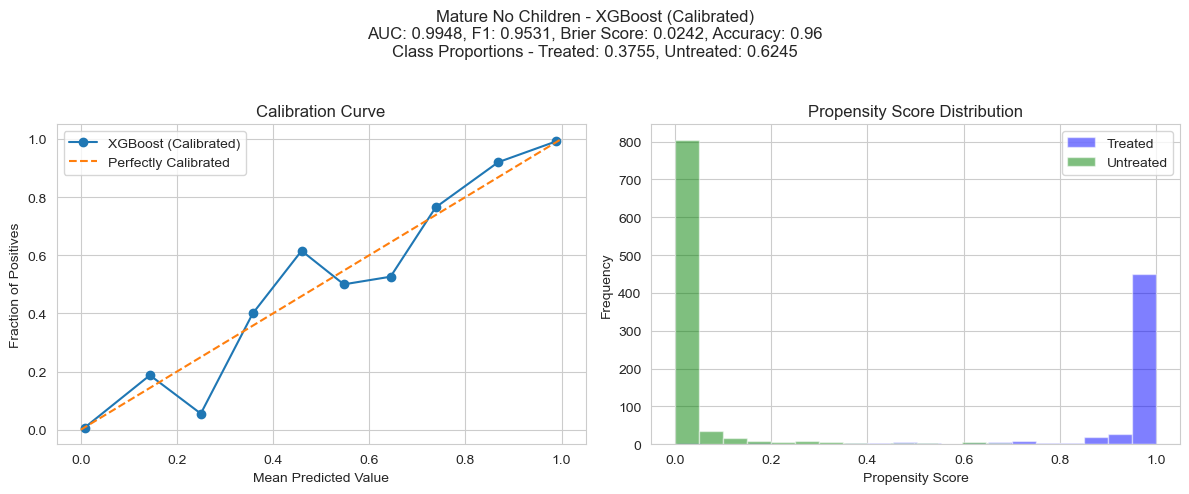

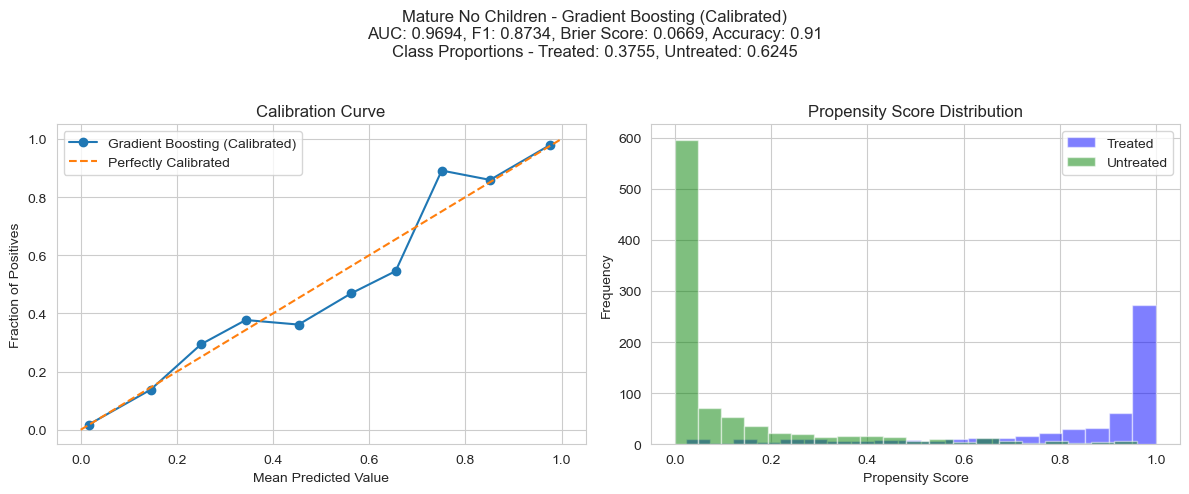

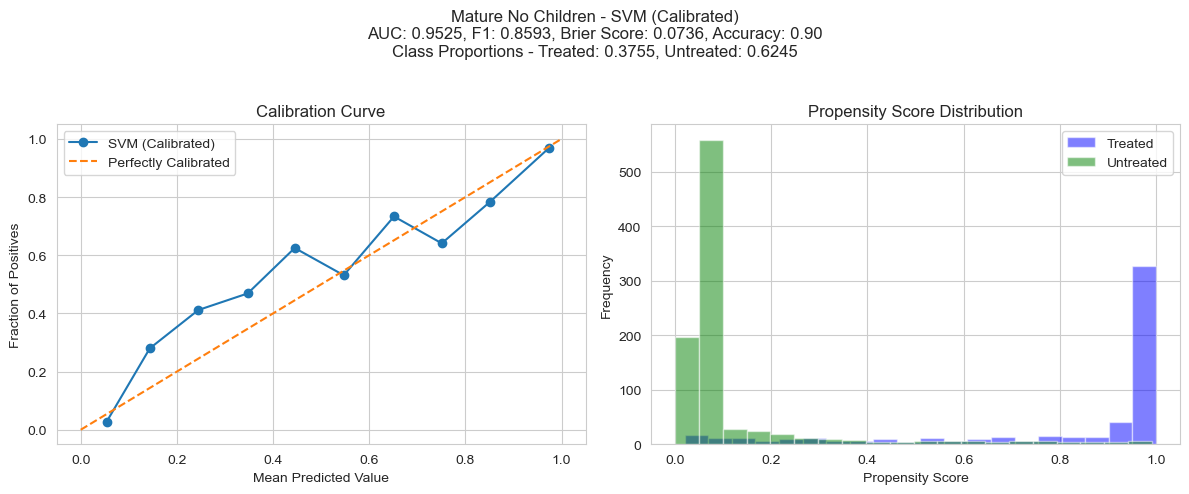

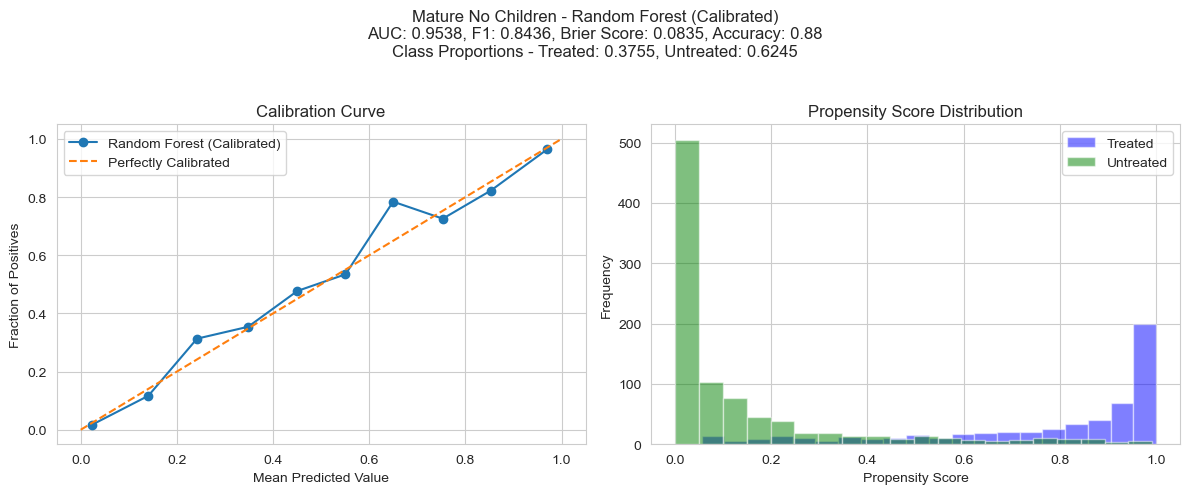

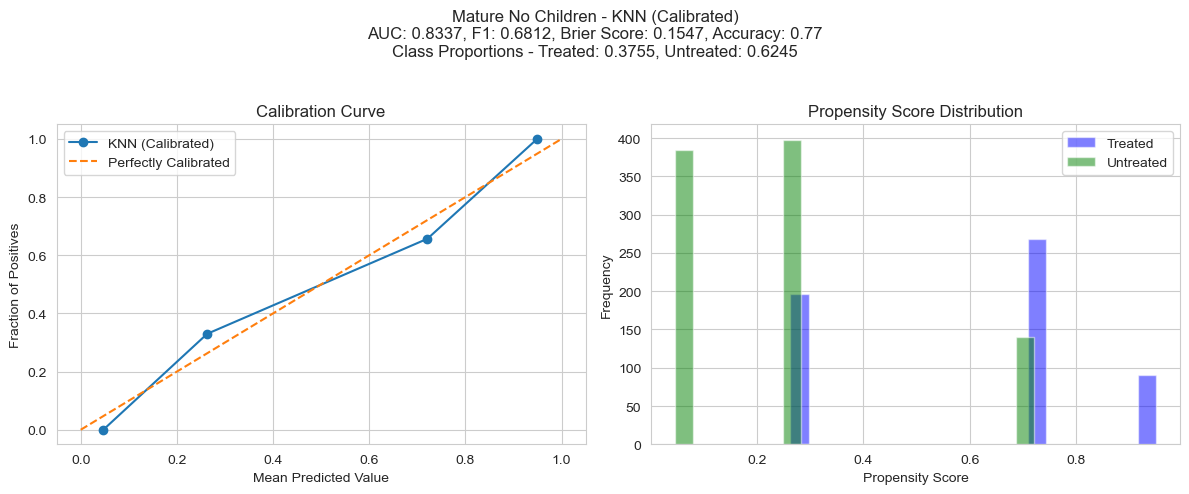

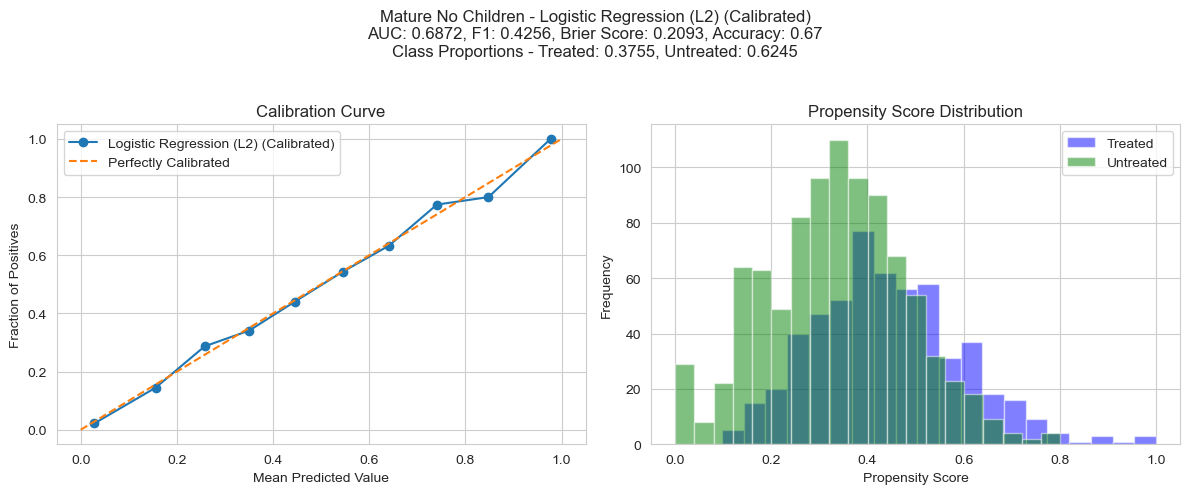

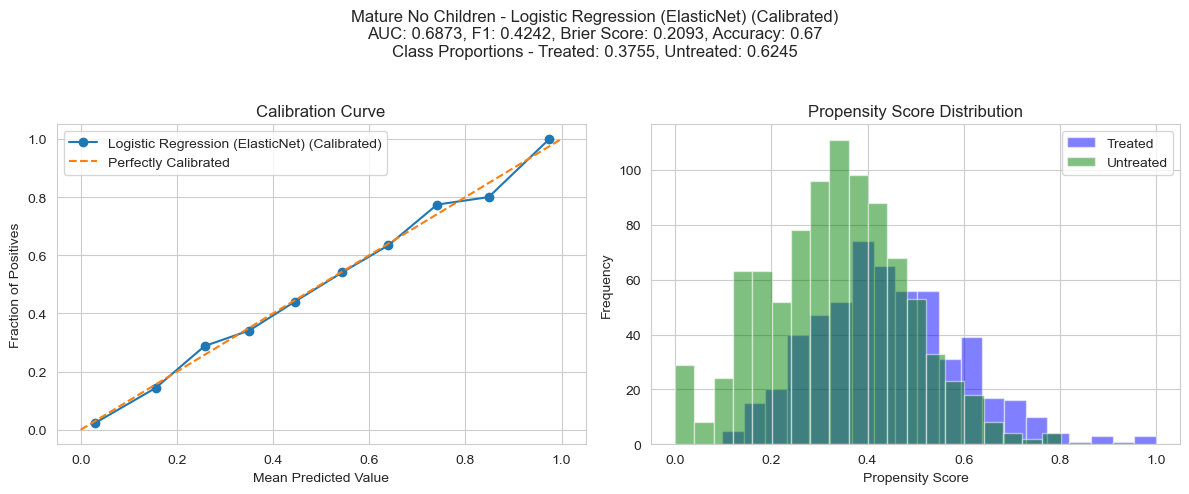

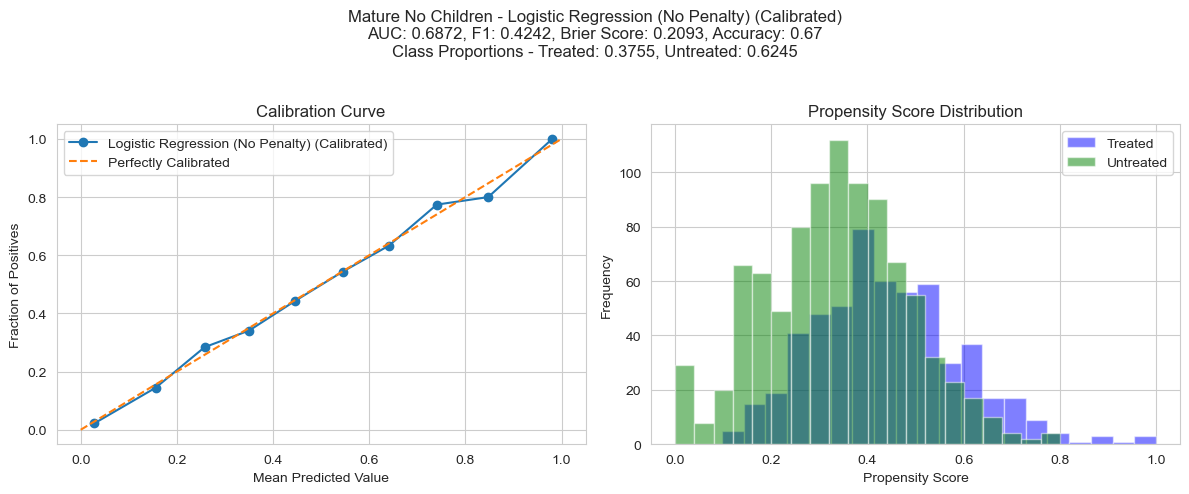

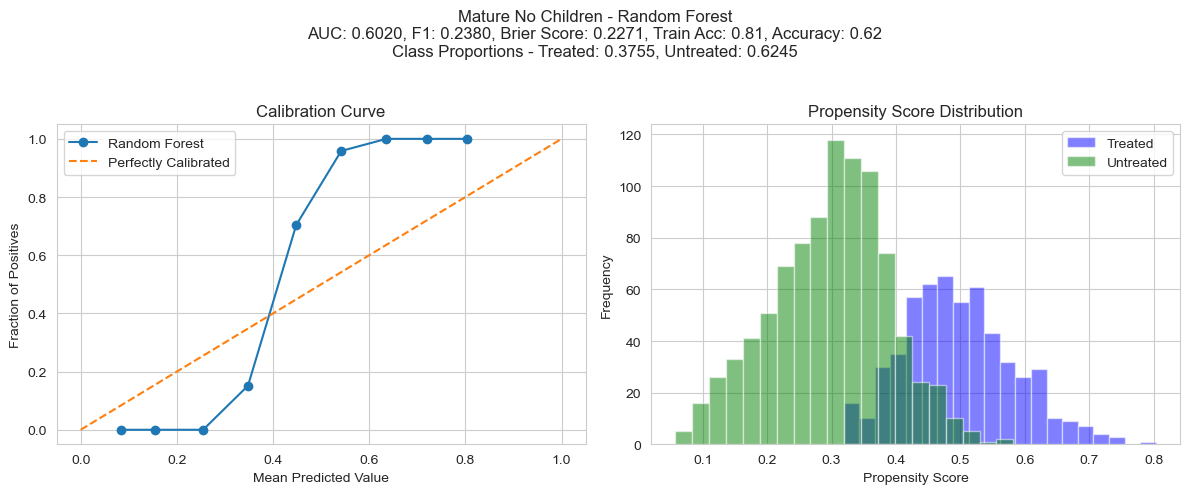

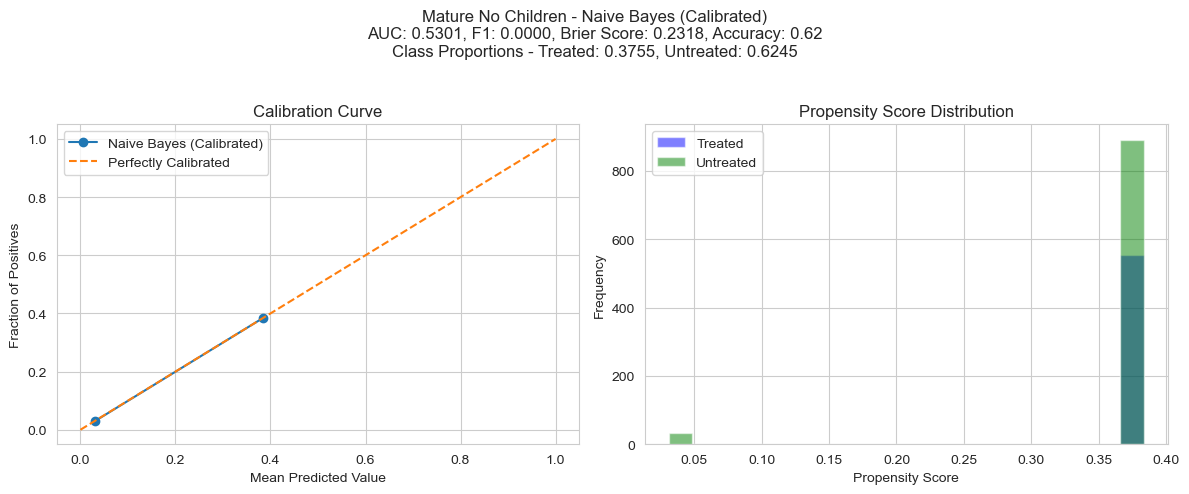

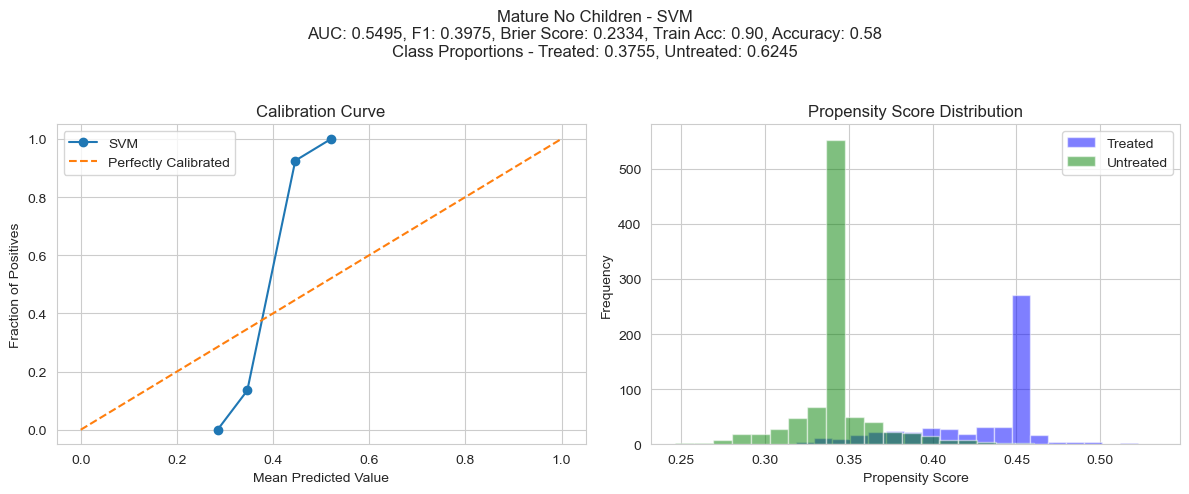

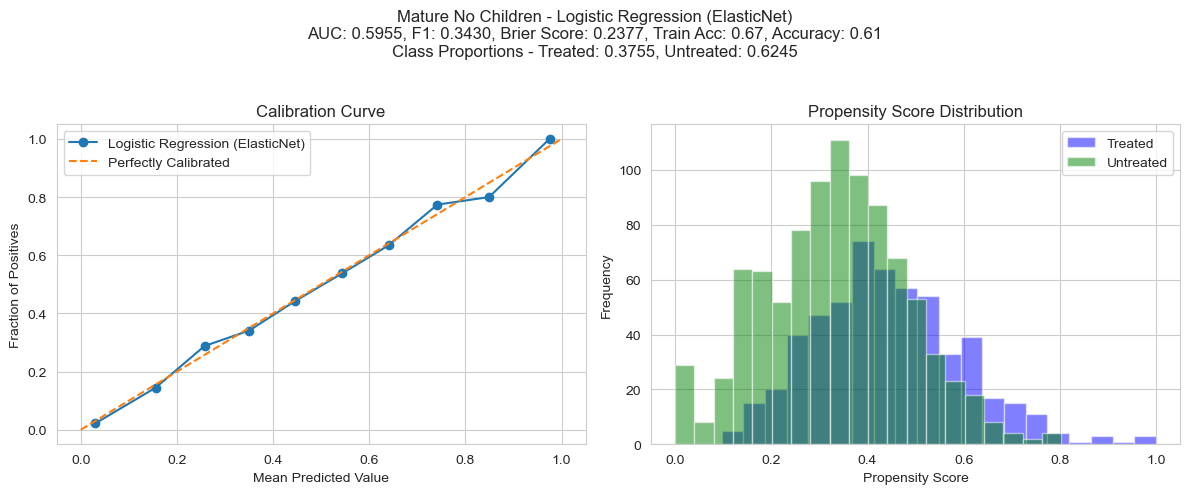

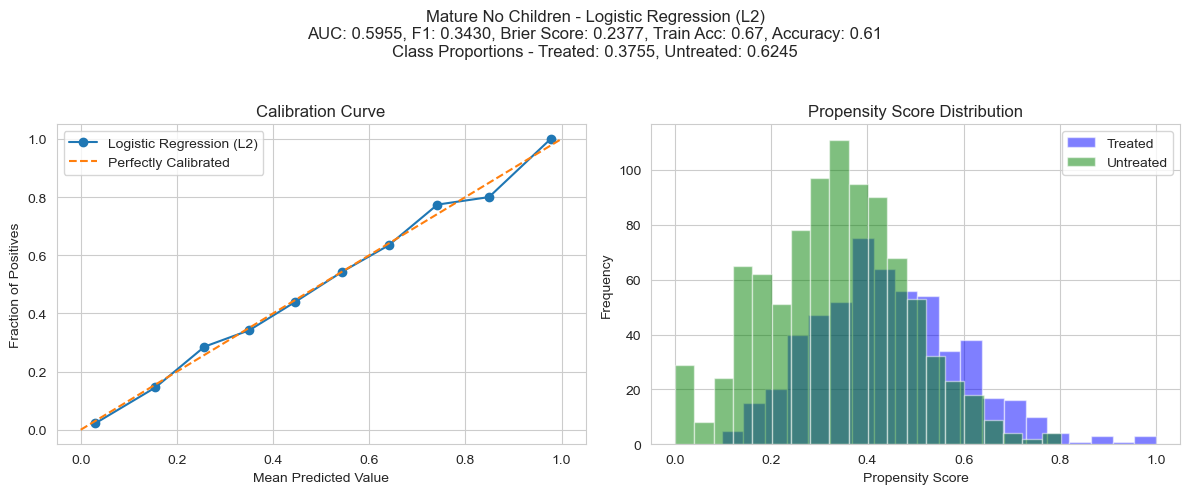

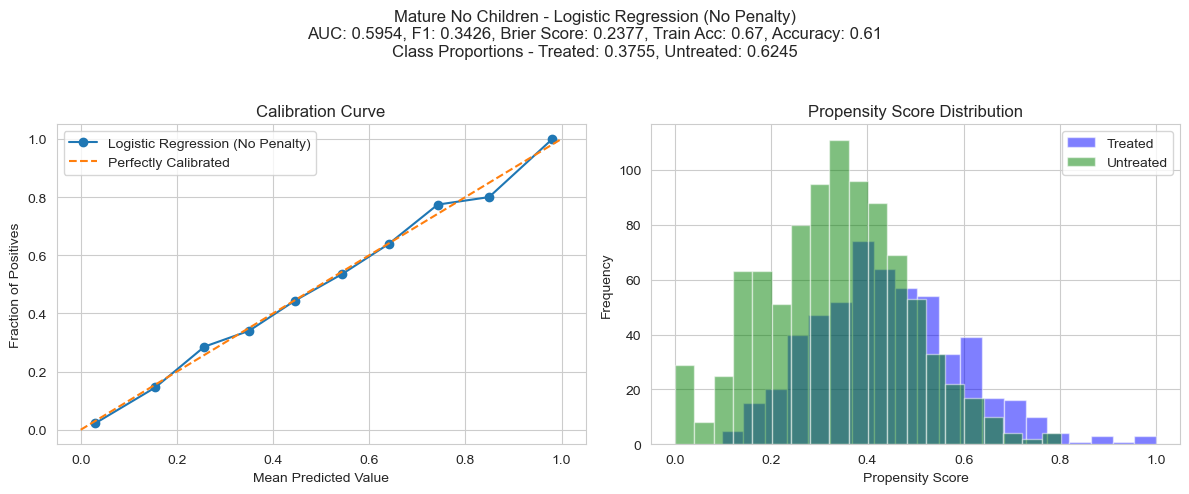

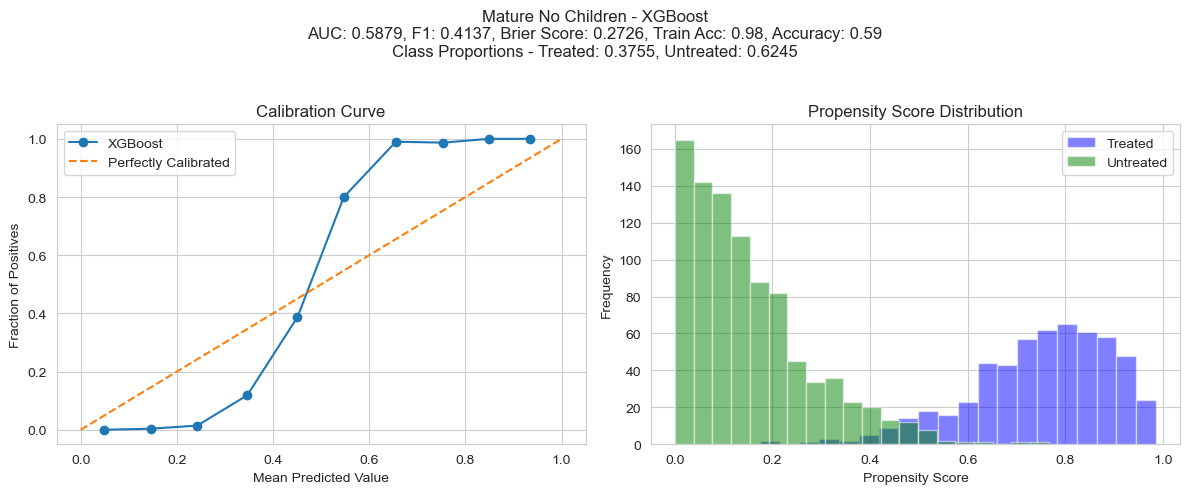

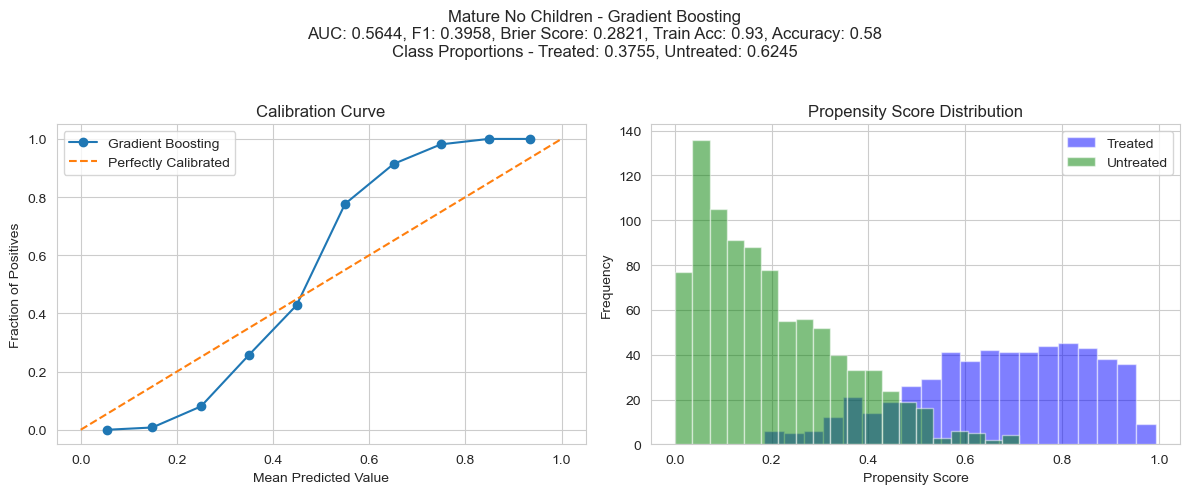

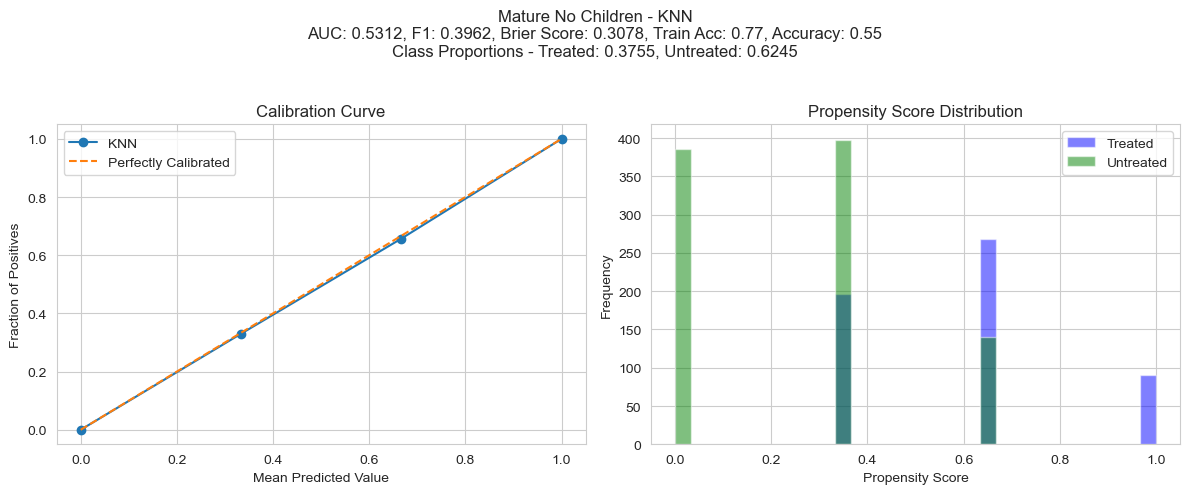

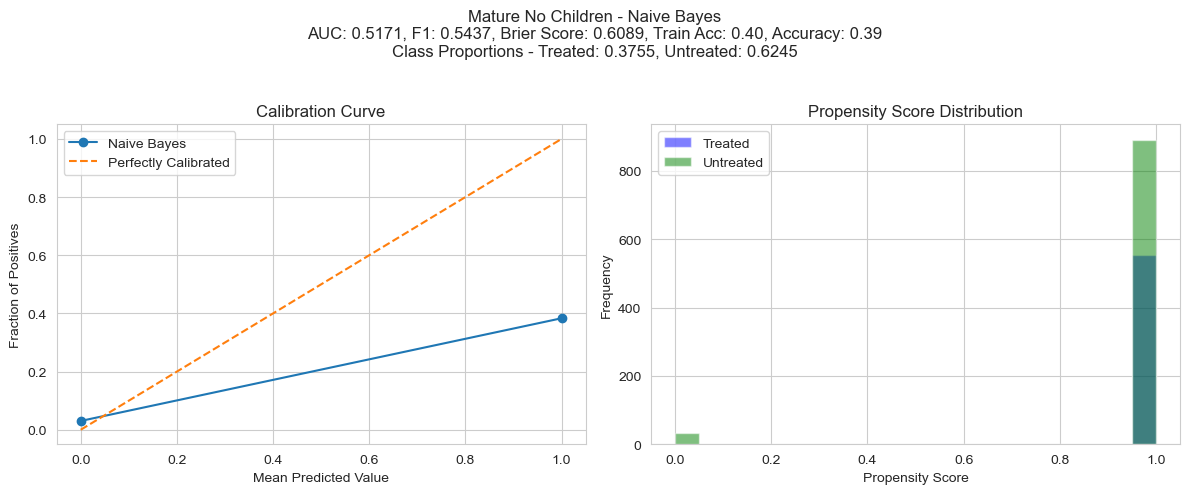

In [6]:
# Plot calibration curves and histograms for all models (both calibrated and uncalibrated)
mnc_ps_estimator.plot_calibration()


In [8]:
# Set default to the calibrated version of Logistic Regression (L2)
mnc_ps_estimator.set_default('Logistic Regression (L2) (Calibrated)')

# Estimate the ATE using the calibrated model
ate, ci, se = mnc_ps_estimator.estimate_ate(**mnc_data)

print(f"Estimated ATE: {ate:.4f}")
print(f"95% Confidence Interval: ({ci[0]:.4f}, {ci[1]:.4f})")
print(f"Standard Error: {se:.4f}")


Estimated ATE: 0.6156
95% Confidence Interval: (-1.1912, 2.4224)


# Mature with children

In [9]:
# load preprocessed data
path = './preprocessed_data/df_mature_with_children_dict.pickle'

mwc_data = load_df_dict(path, threshold=2)


In [10]:
mwc_data.keys()

dict_keys(['Y_train', 'Y_test', 'T_train', 'T_test', 'X_train', 'X_test'])

In [11]:
# Assuming X_train, X_test, Y_train, Y_test, T_train, T_test are already defined

# Initialize the propensity score estimator with a dataset name
mwc_ps_estimator = PropensityScoreEstimator(dataset_name="Mature With Children")

# Fit the models using cross-validation and calibration (20% of training set for calibration)
mwc_ps_estimator.fit(**mwc_data, calibration_fraction=0.2)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


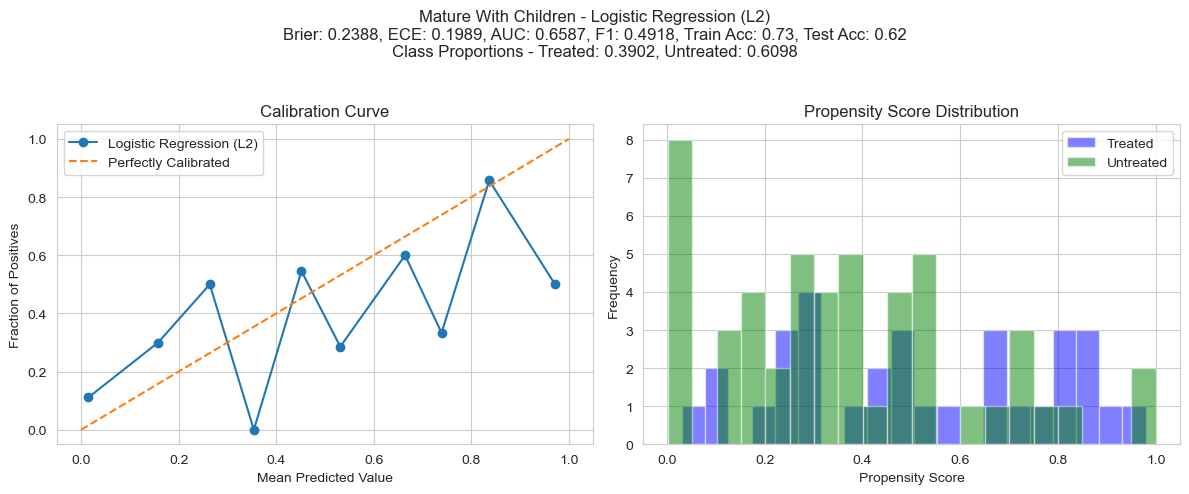

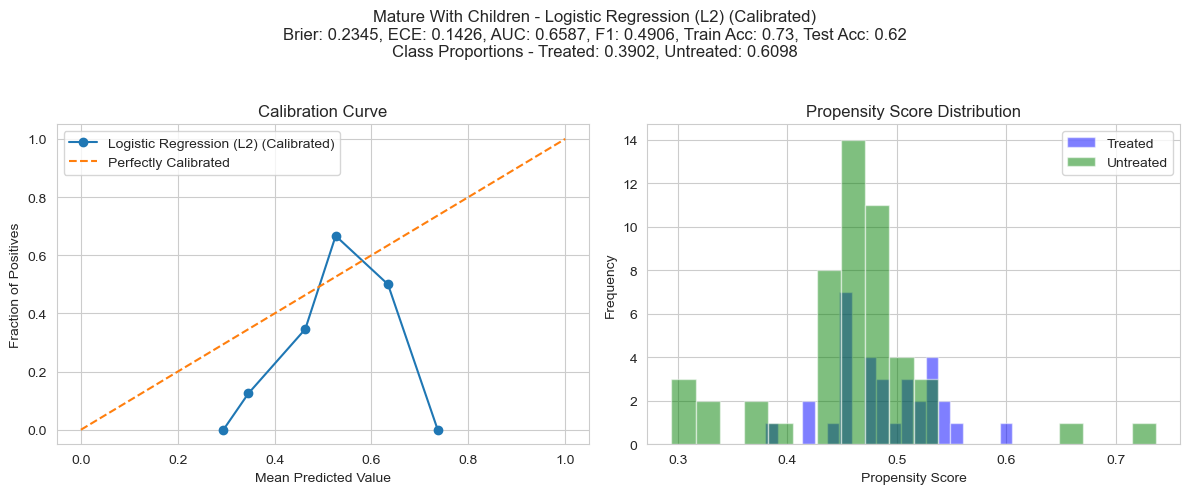

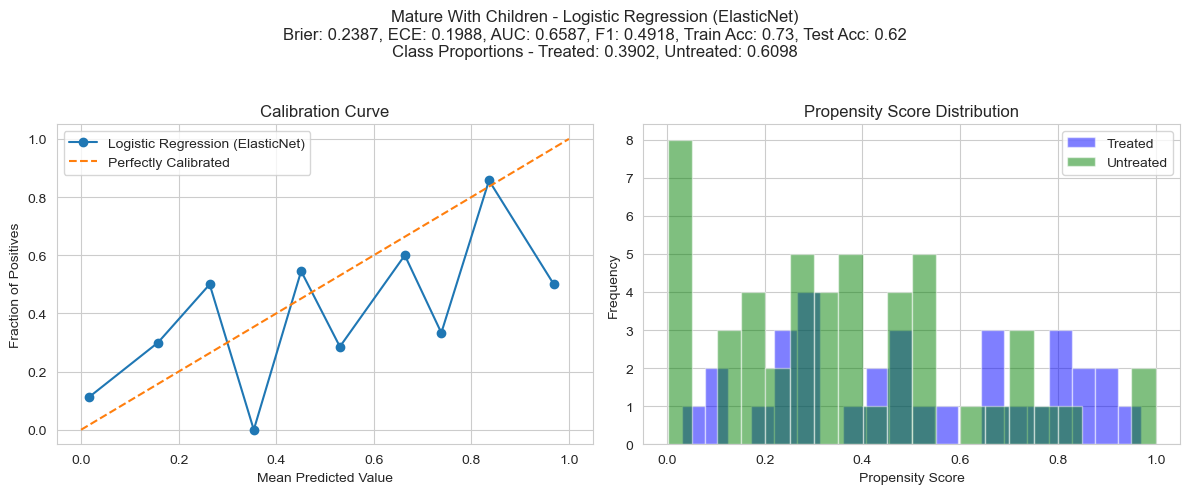

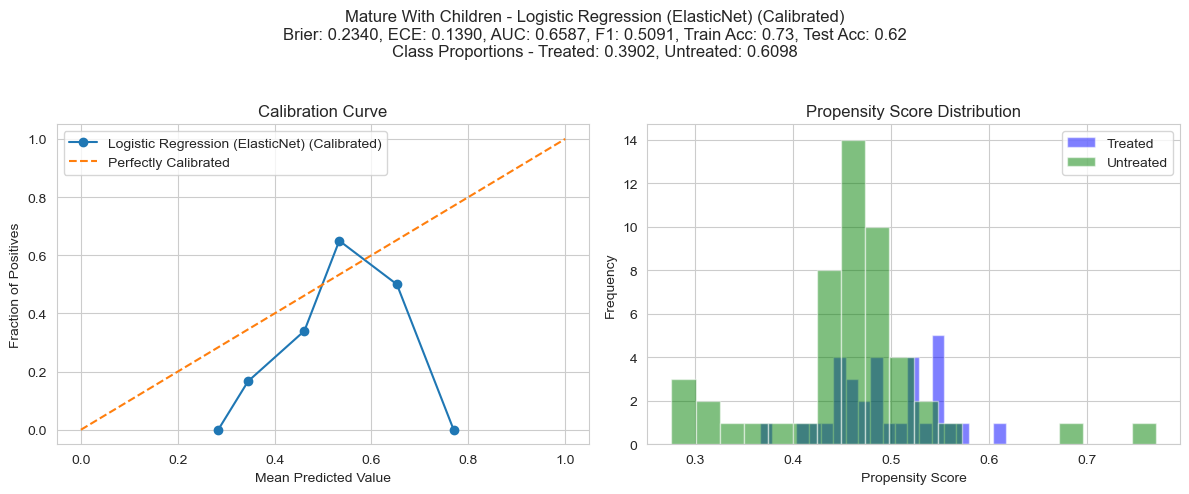

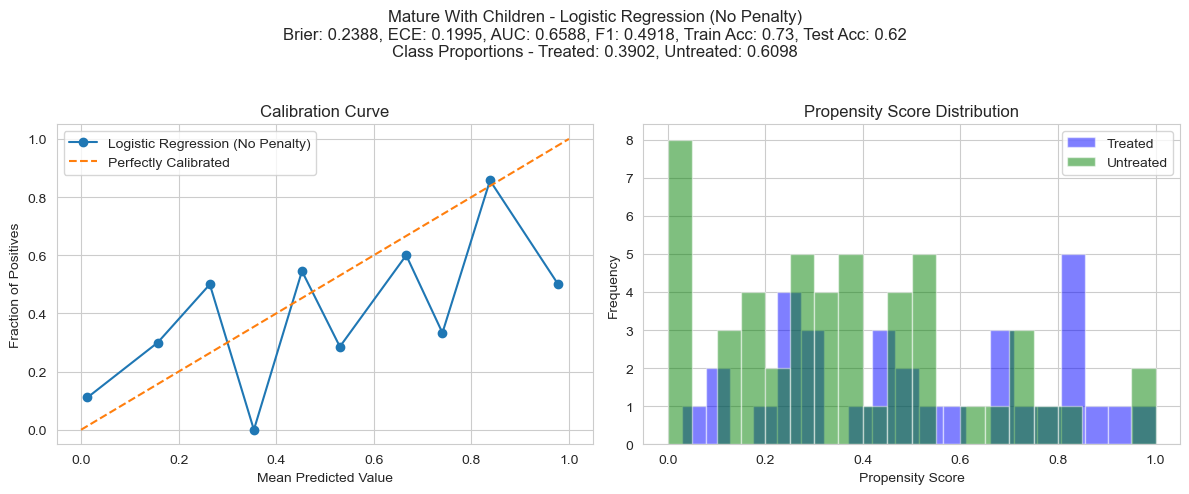

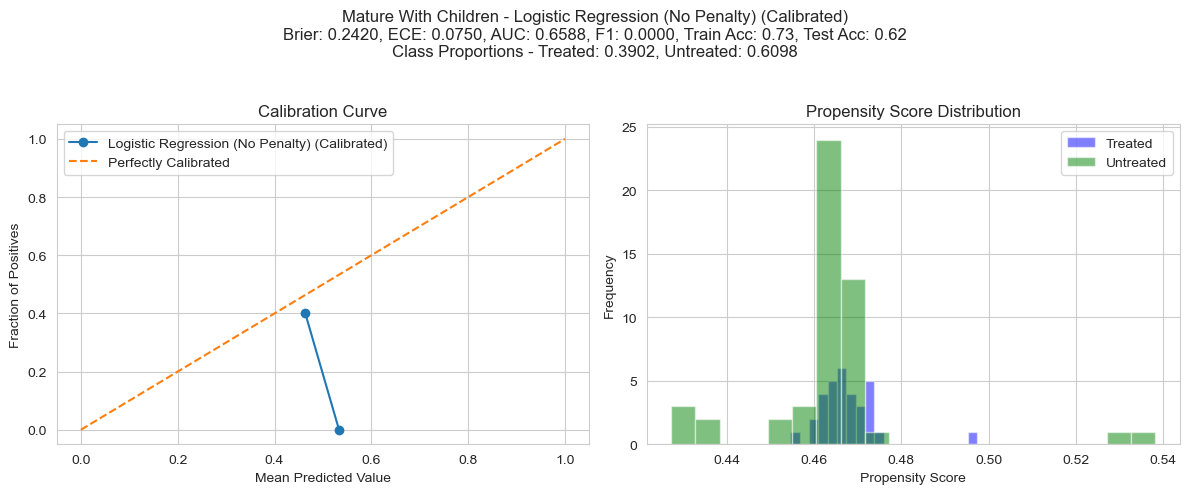

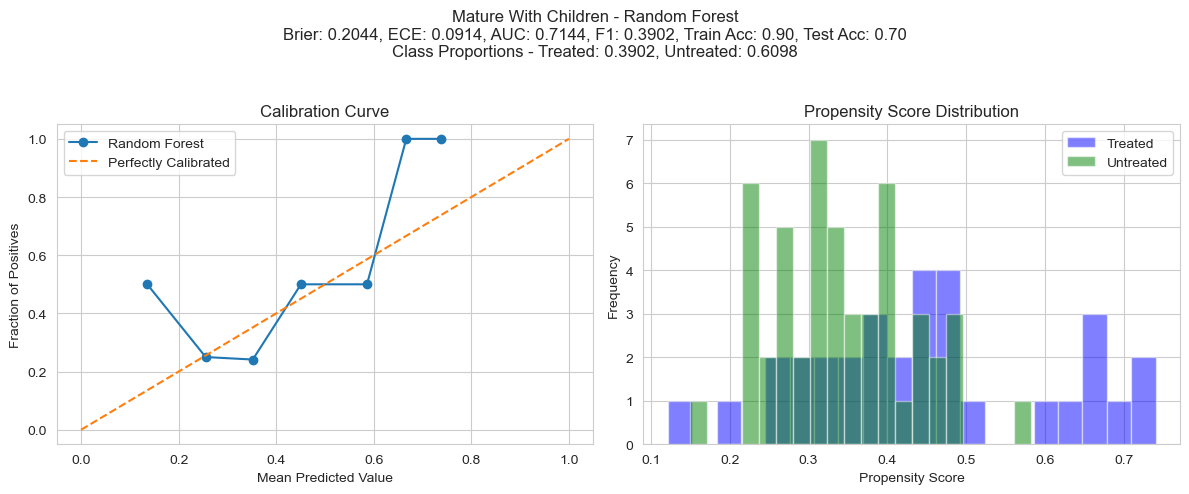

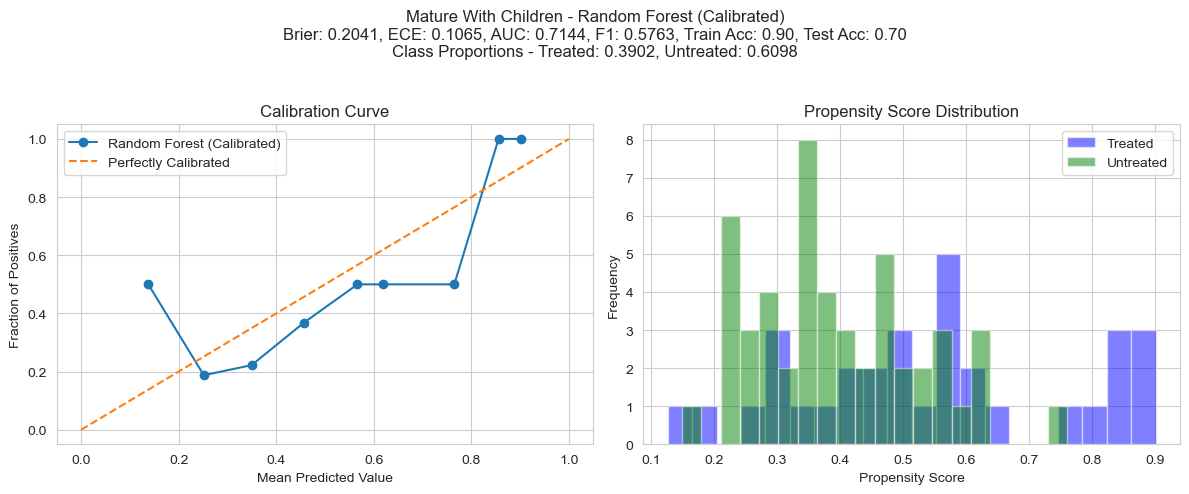

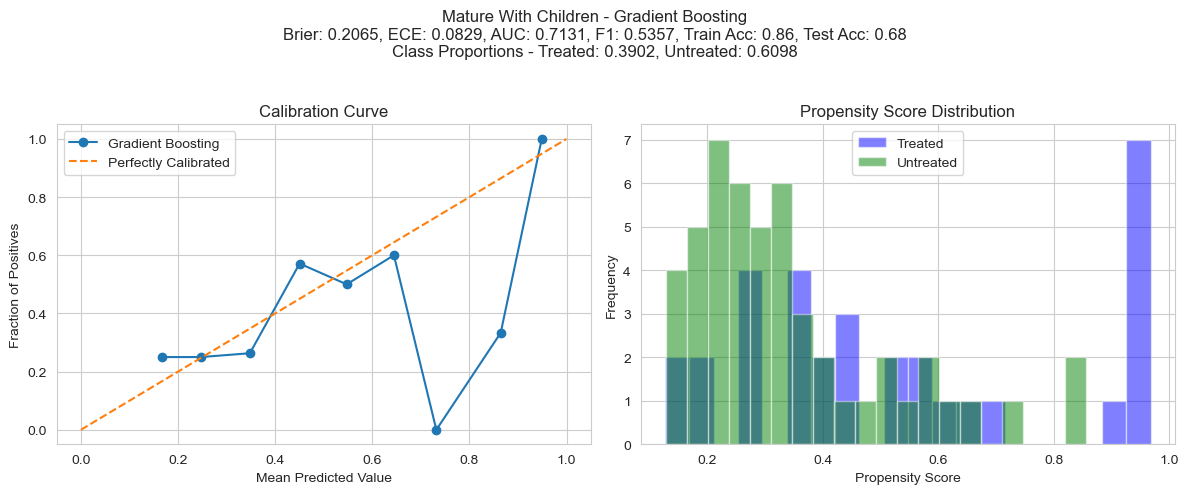

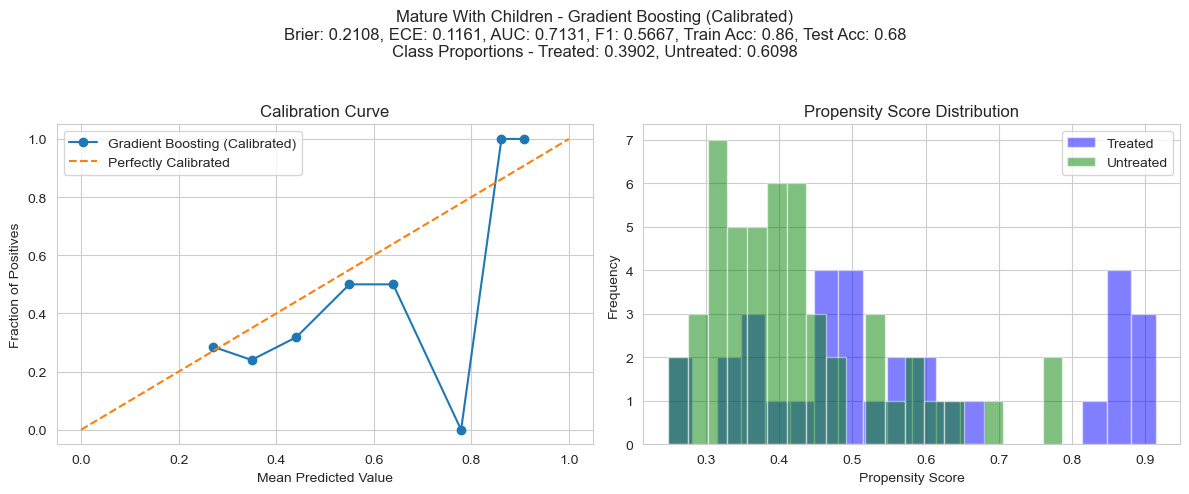

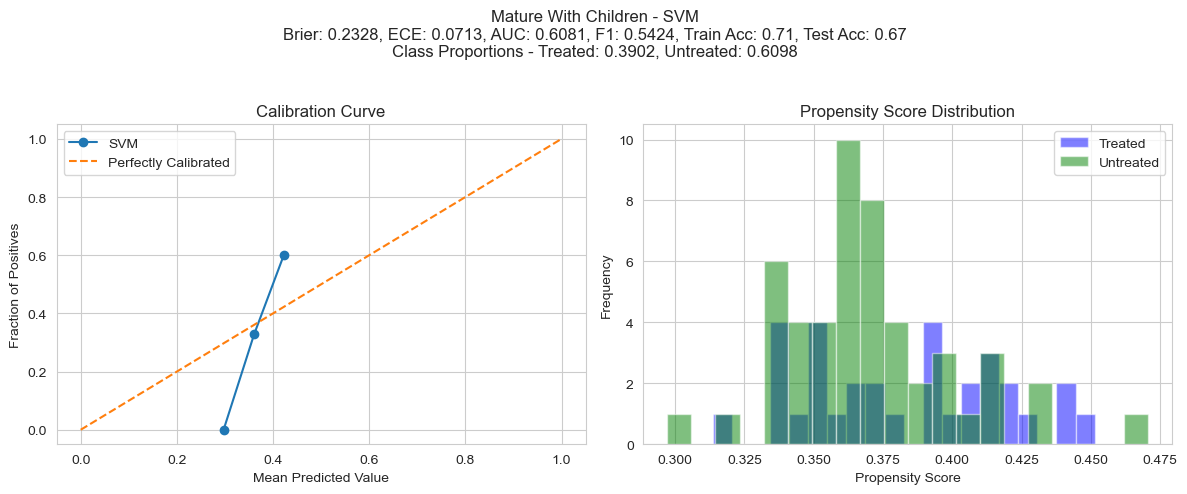

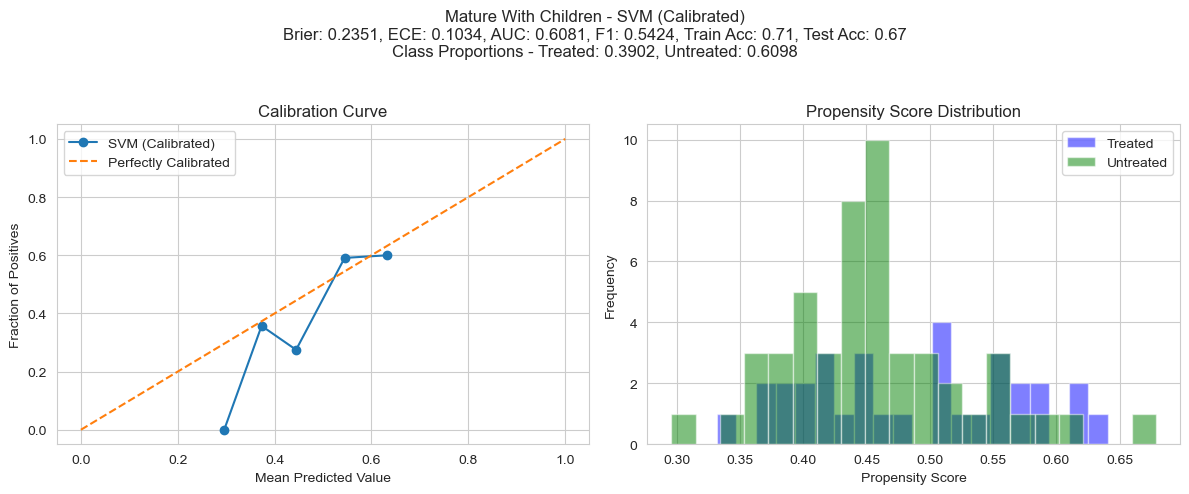

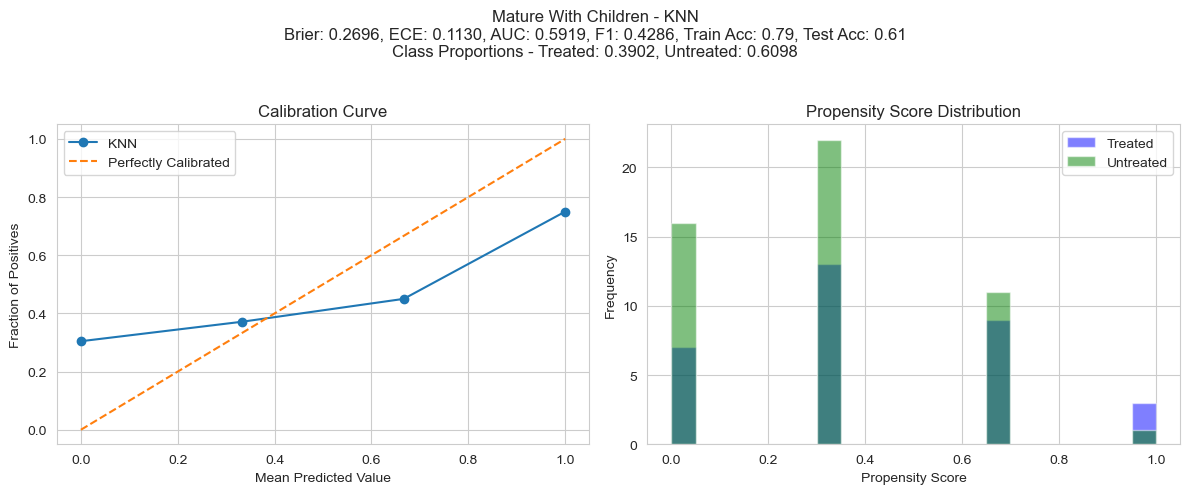

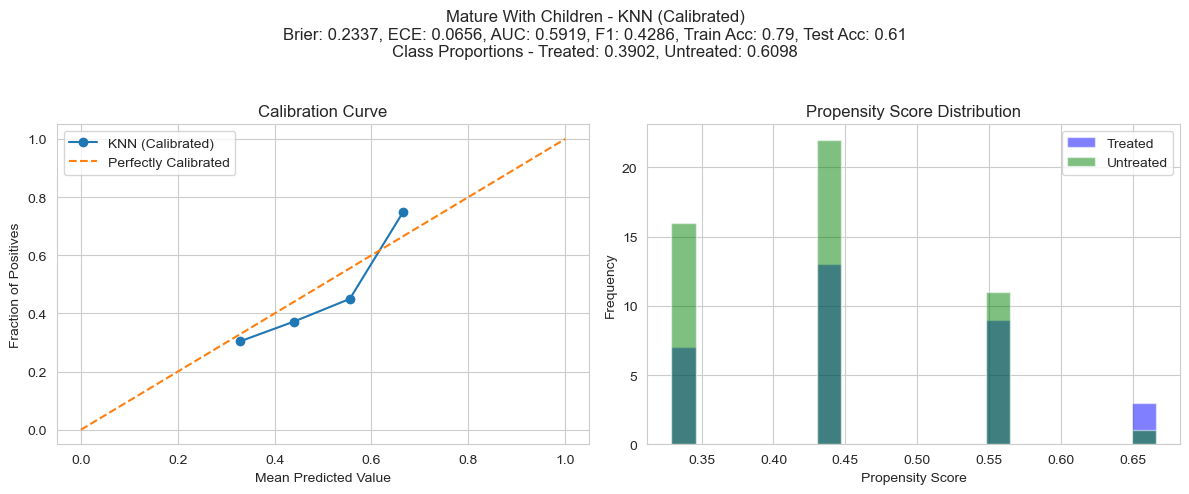

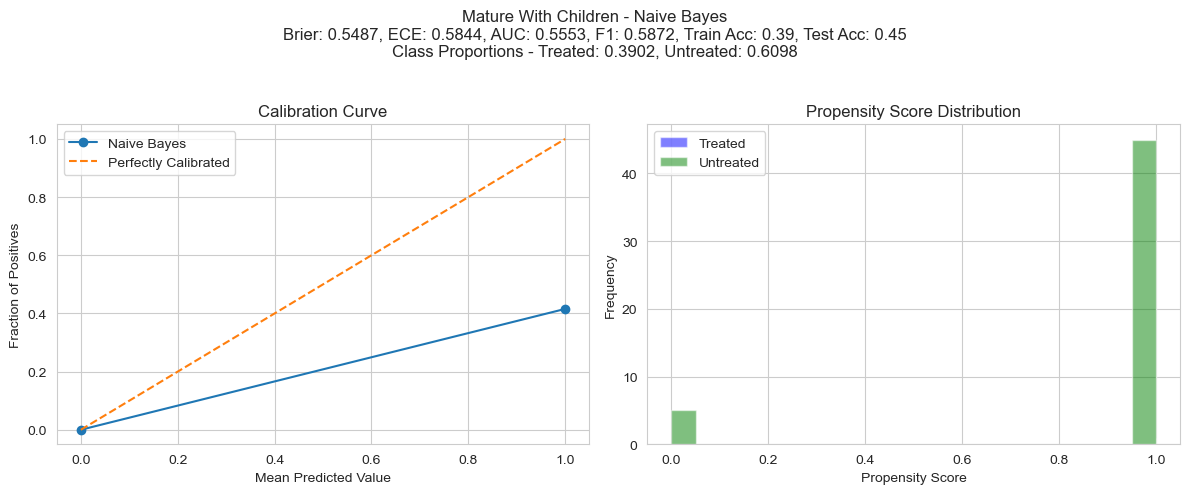

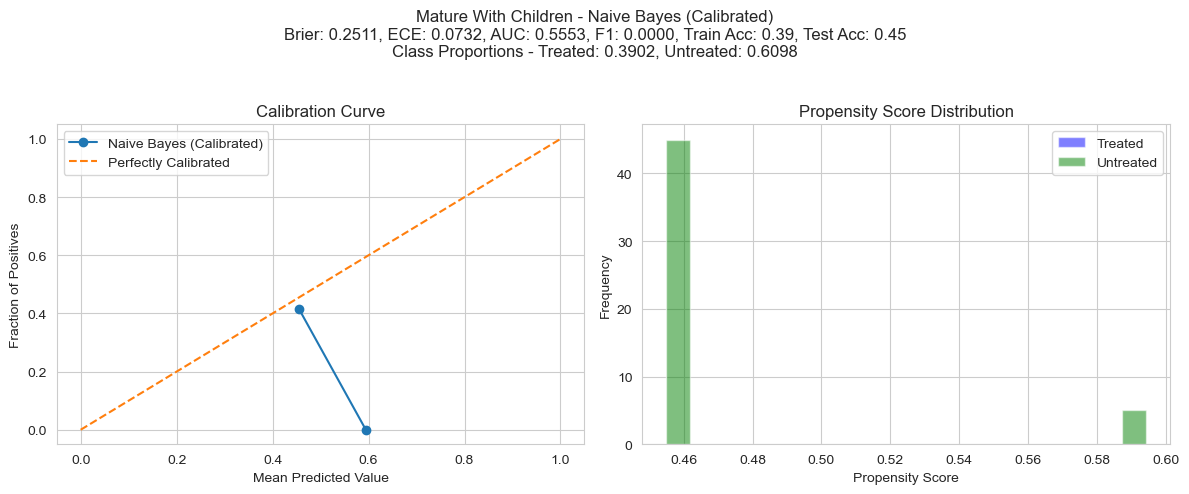

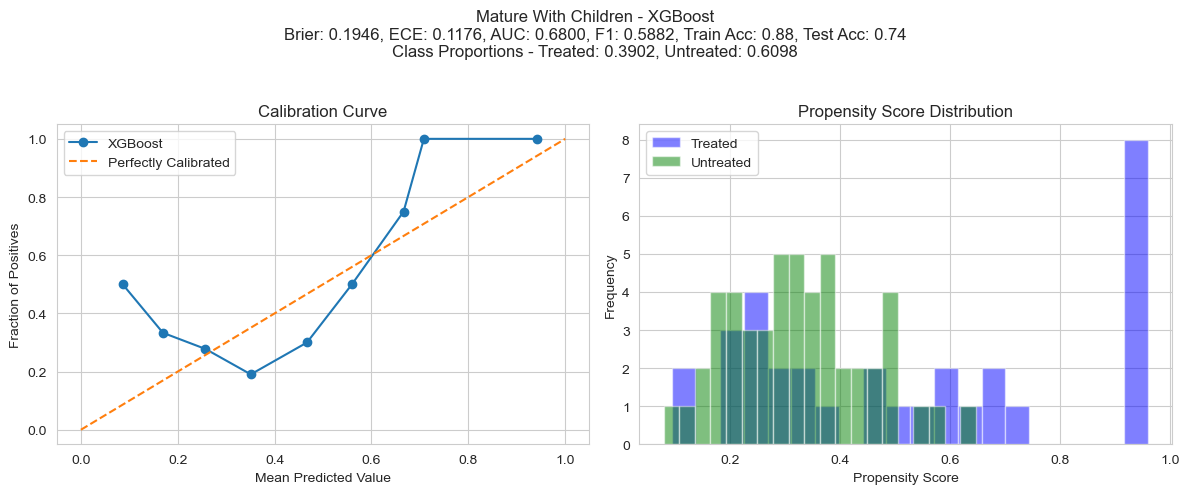

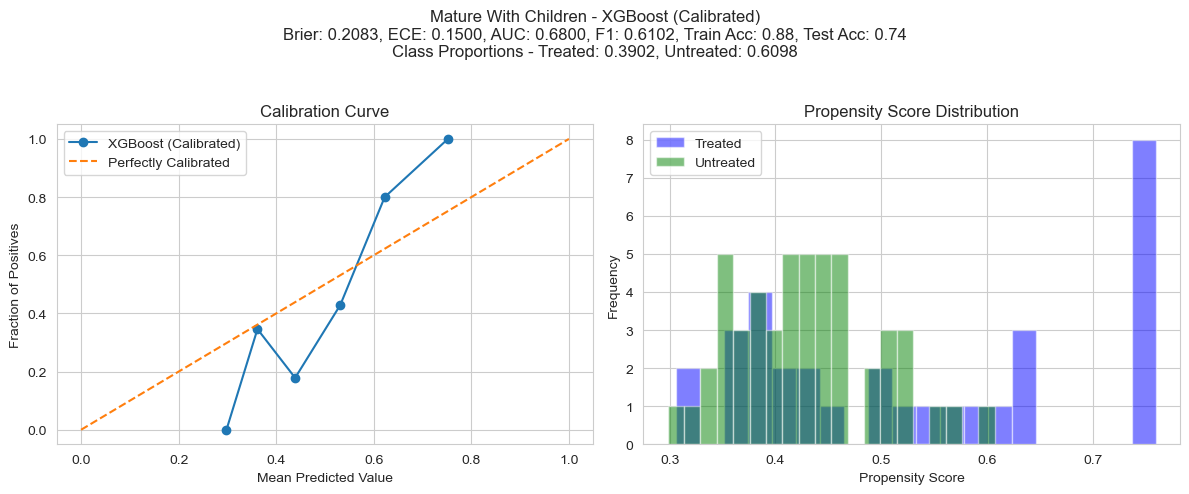

In [12]:
# Plot calibration curves and histograms for all models (both calibrated and uncalibrated)
mwc_ps_estimator.plot_calibration()


In [13]:
# Set default to the calibrated version of Logistic Regression (L2)
mwc_ps_estimator.set_default('Logistic Regression (L2) (Calibrated)')

# Estimate the ATE using the calibrated model
ate, ci = mwc_ps_estimator.estimate_ate(mwc_data['X_test'], mwc_data['T_test'], mwc_data['Y_test'])

print(f"Estimated ATE: {ate:.4f}")
print(f"95% Confidence Interval: ({ci[0]:.4f}, {ci[1]:.4f})")


Estimated ATE: 0.6949
95% Confidence Interval: (-0.5898, 1.9797)


# Young no children

In [14]:
# load preprocessed data
path = './preprocessed_data/df_young_no_children_dict.pickle'

ync_data = load_df_dict(path, threshold=2)


In [15]:
ync_data.keys()

dict_keys(['Y_train', 'Y_test', 'T_train', 'T_test', 'X_train', 'X_test'])

In [16]:
# Assuming X_train, X_test, Y_train, Y_test, T_train, T_test are already defined

# Initialize the propensity score estimator with a dataset name
ync_ps_estimator = PropensityScoreEstimator(dataset_name="Young No Children")

# Fit the models using cross-validation and calibration (20% of training set for calibration)
ync_ps_estimator.fit(**ync_data, calibration_fraction=0.2)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Owner\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


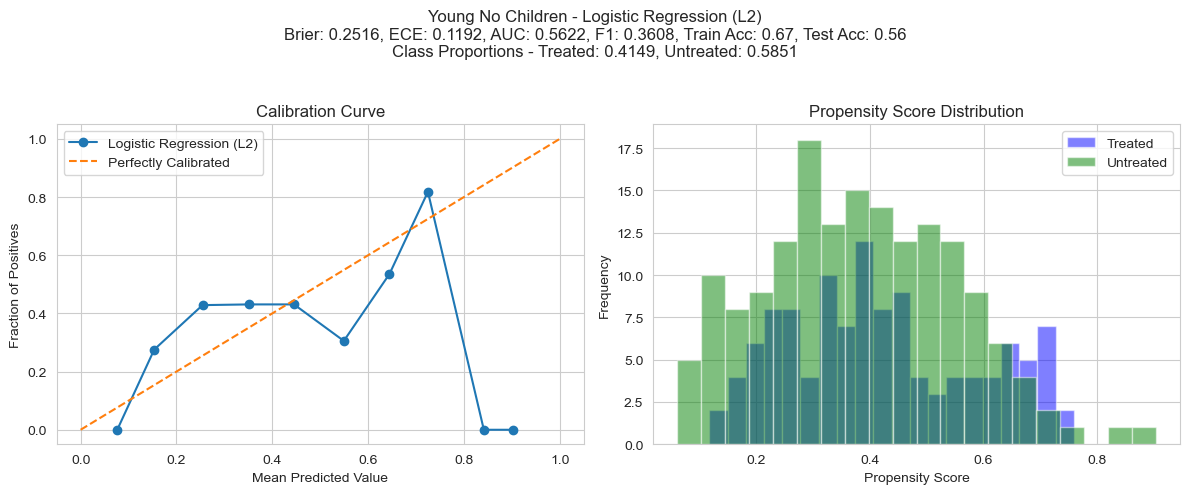

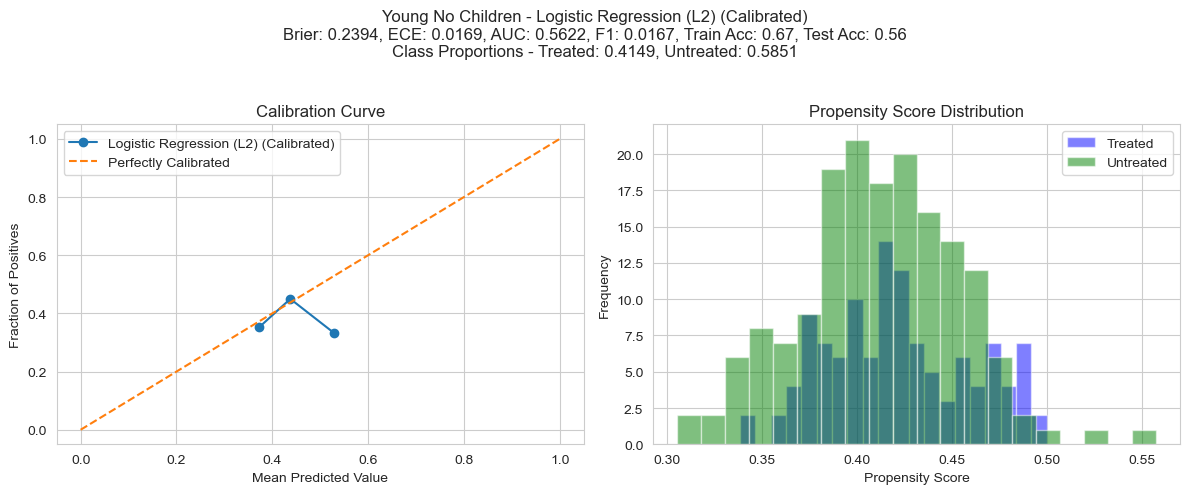

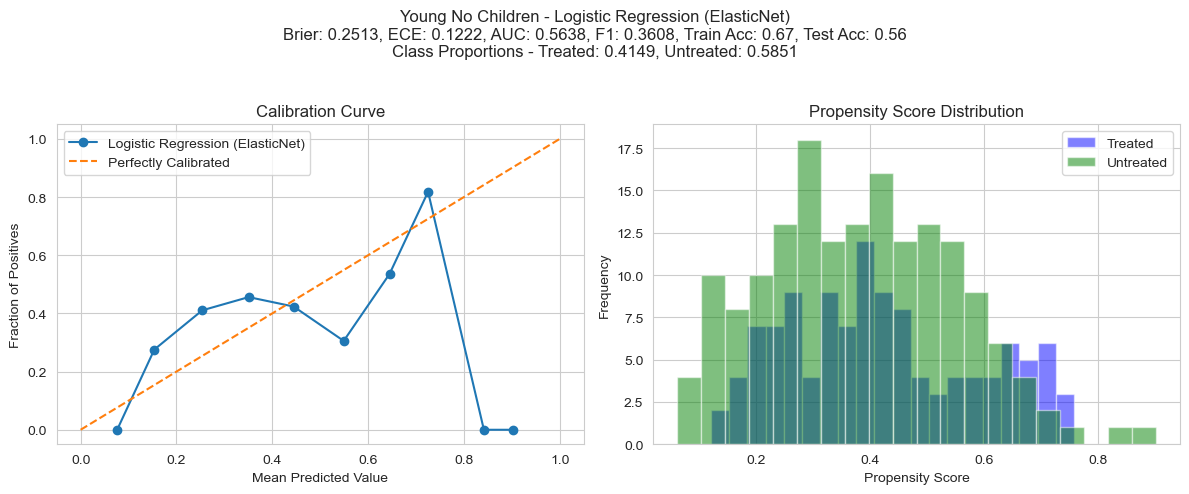

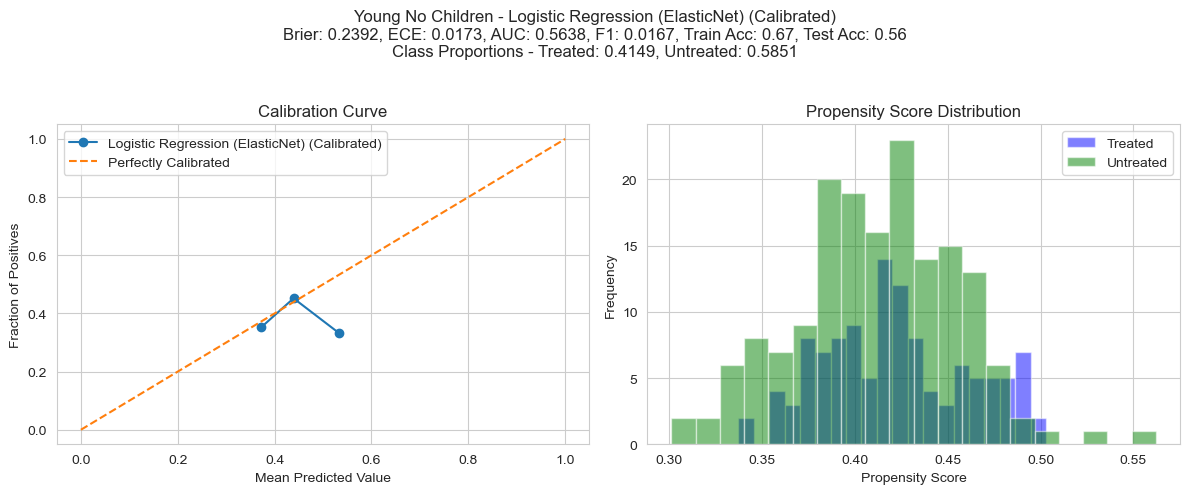

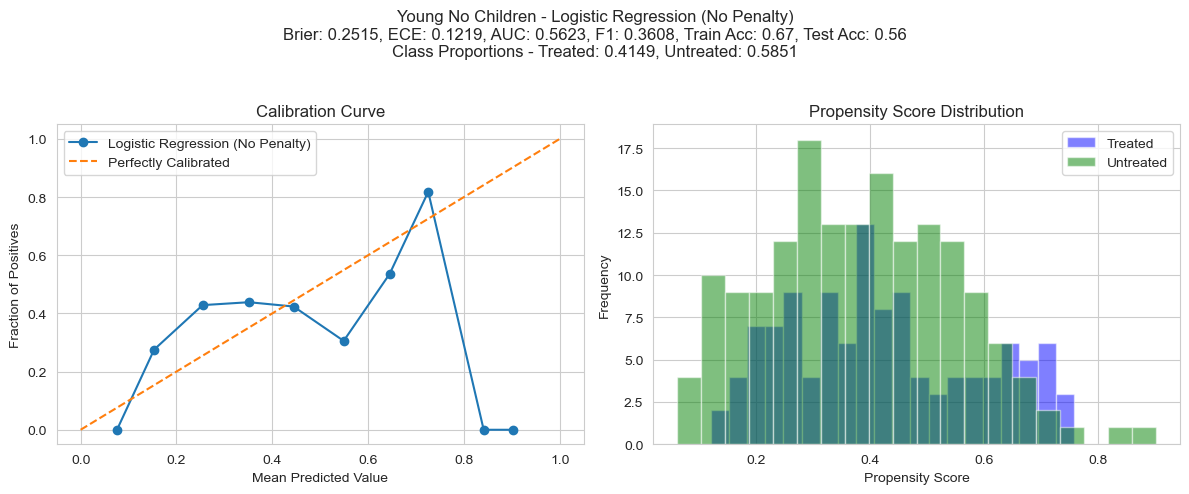

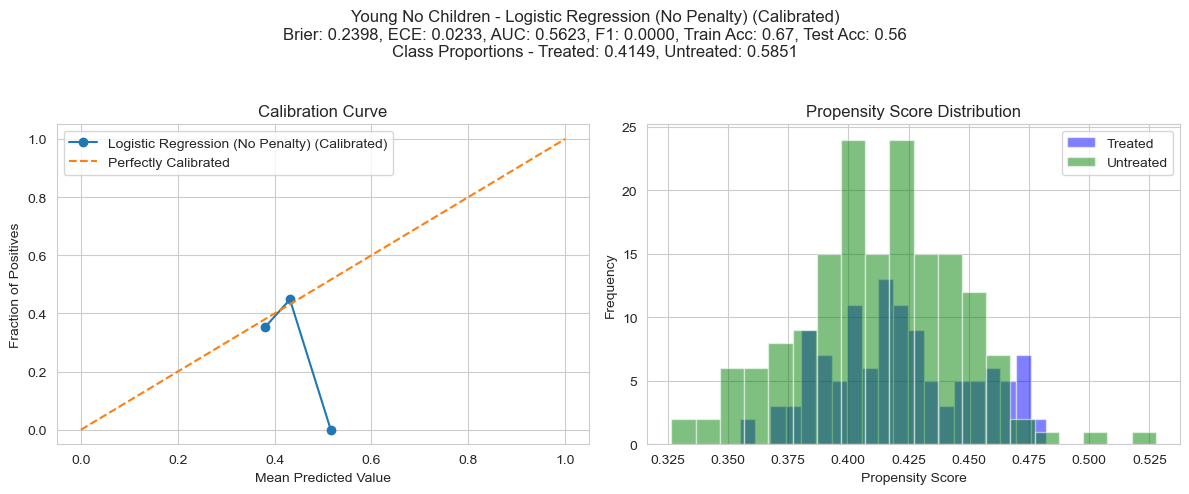

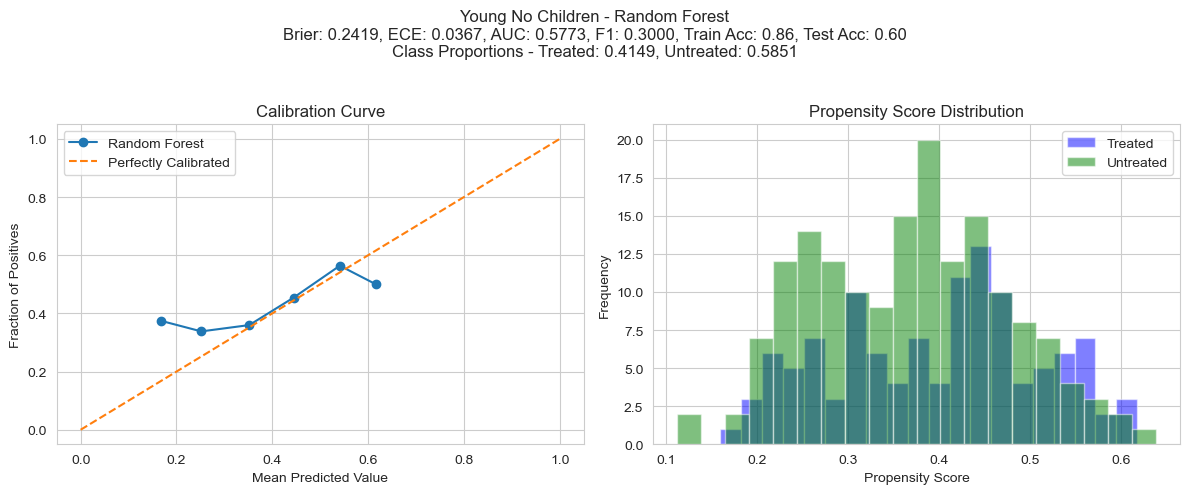

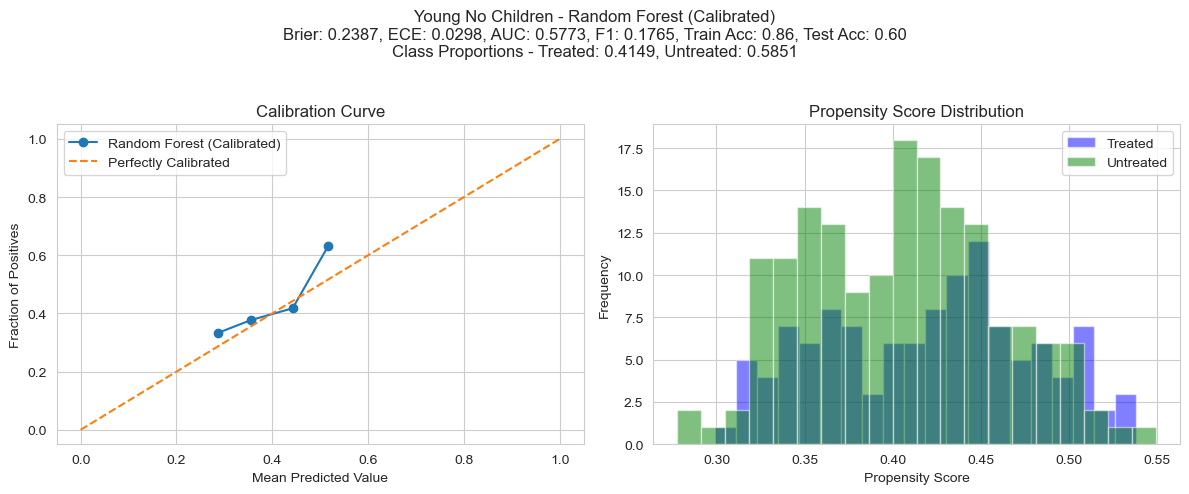

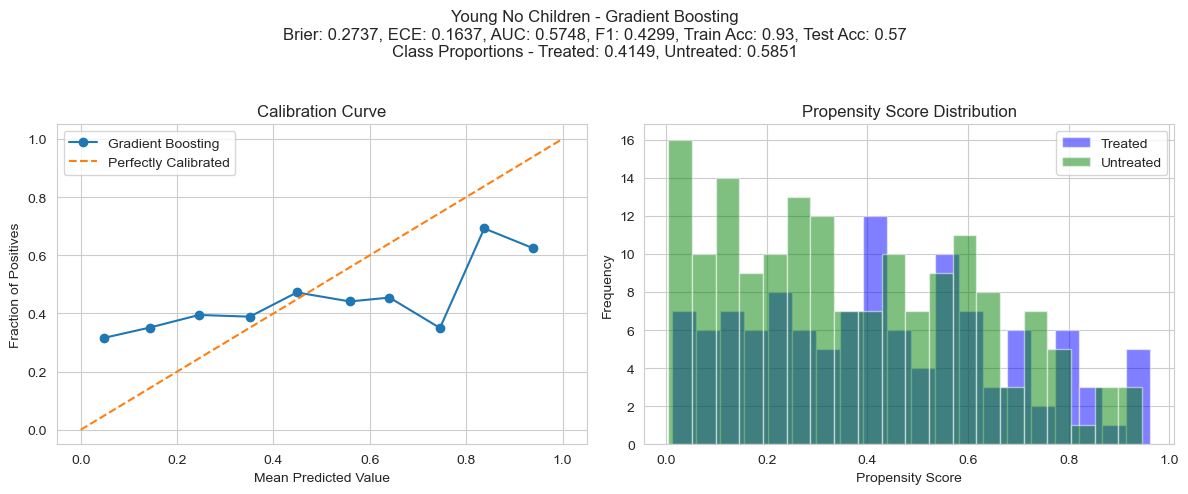

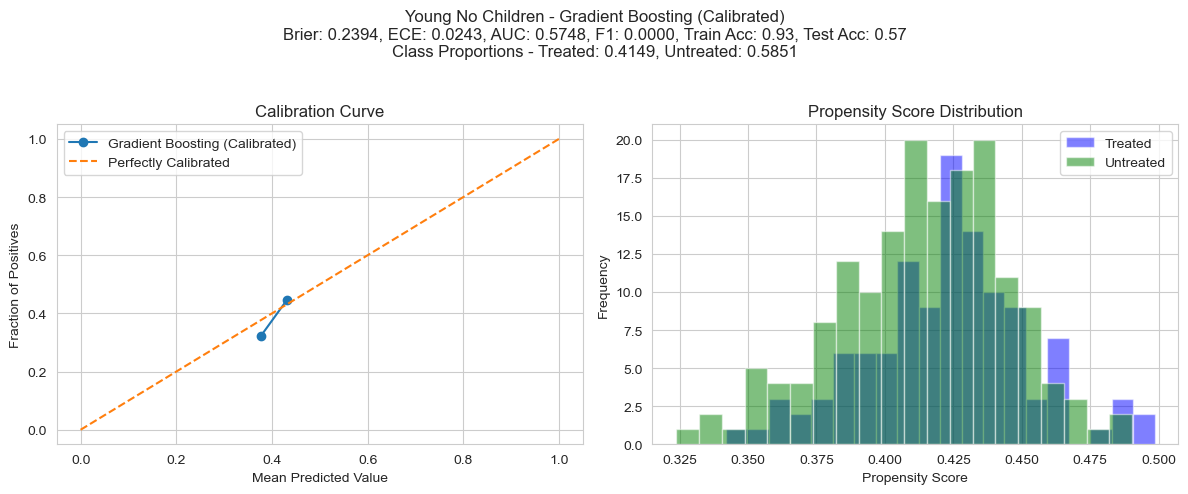

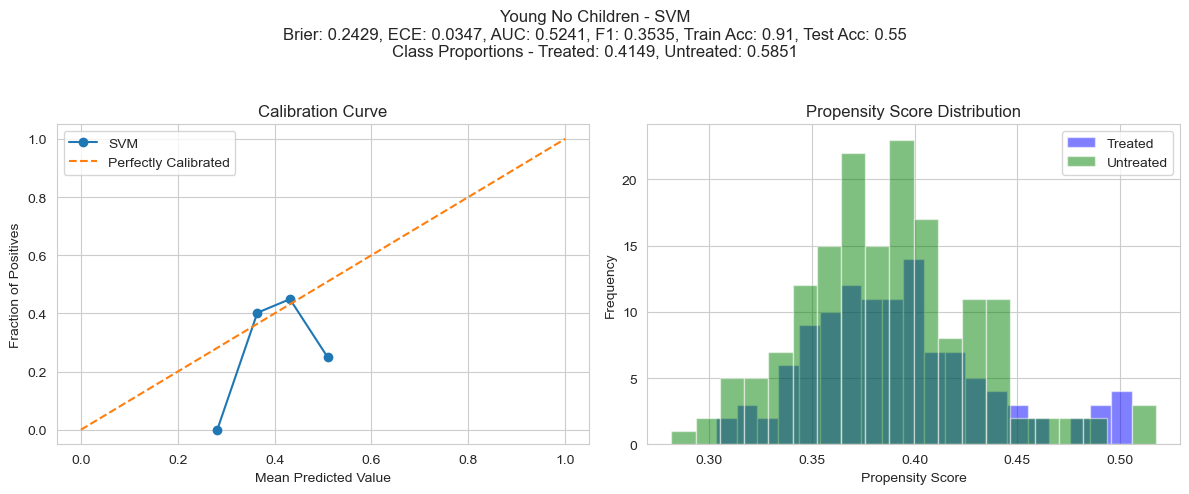

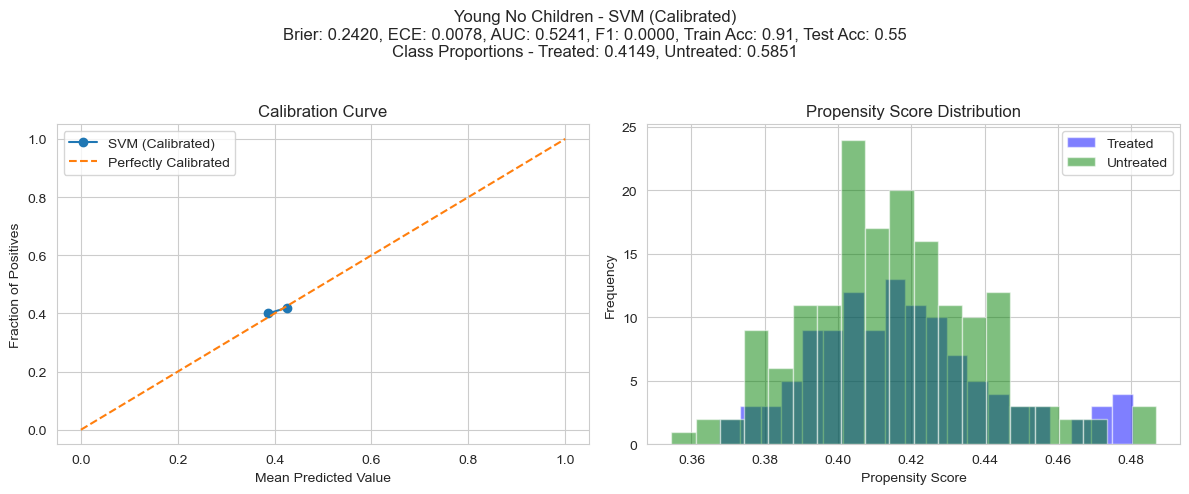

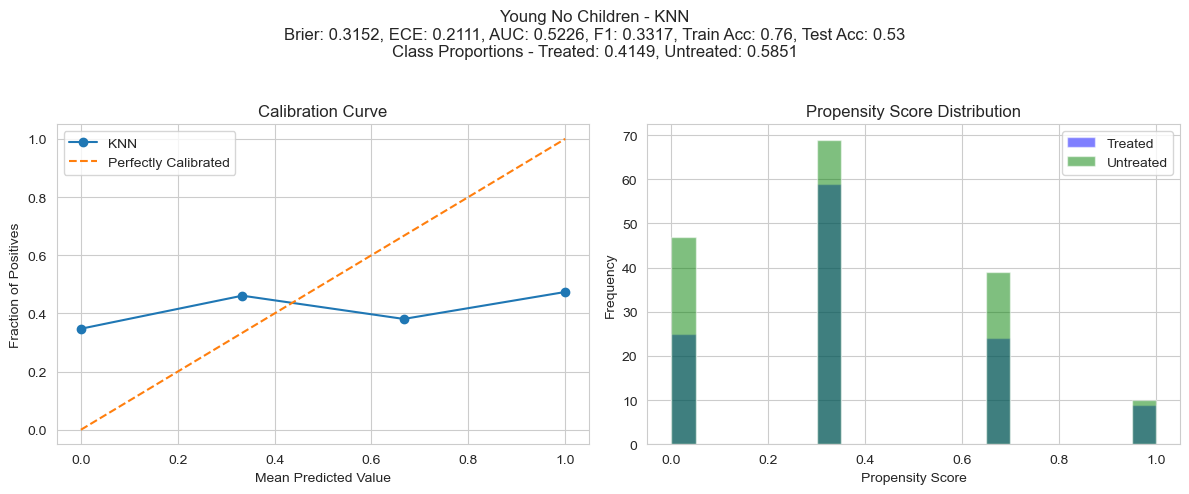

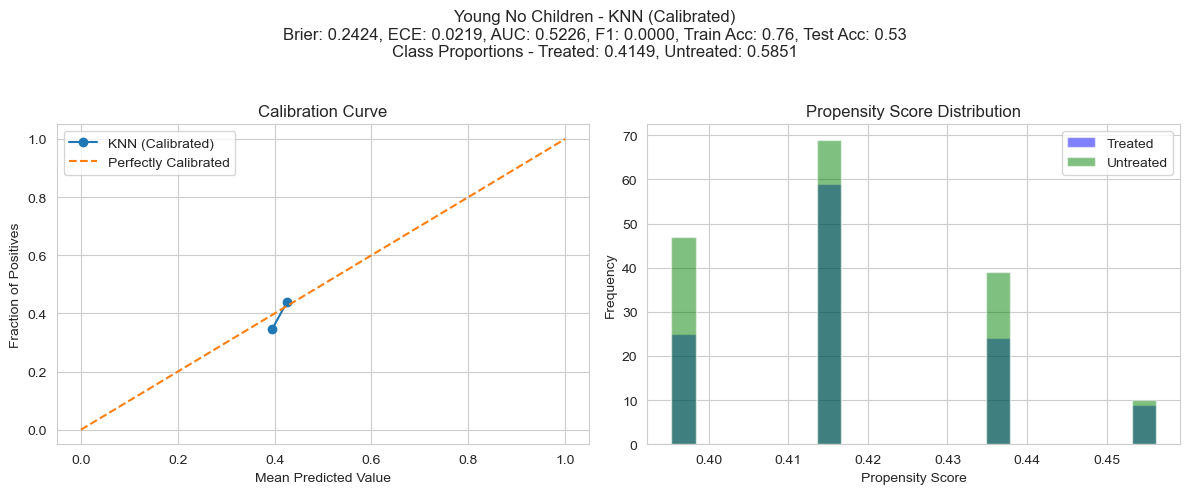

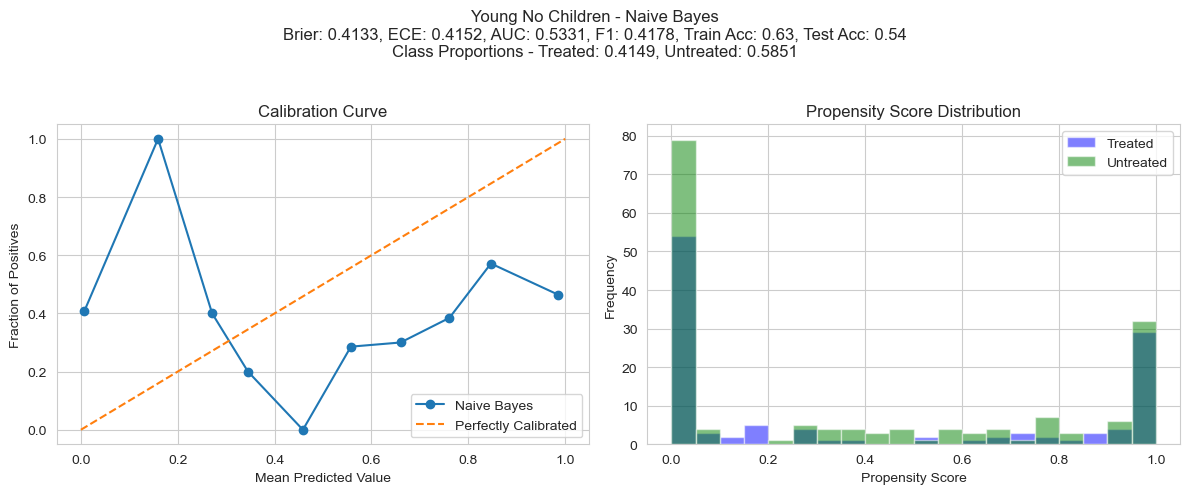

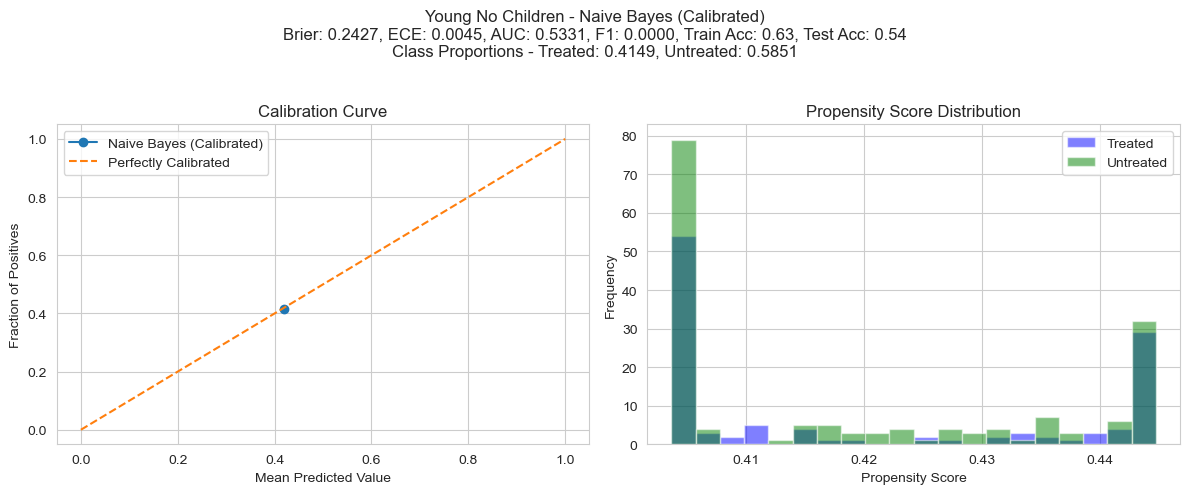

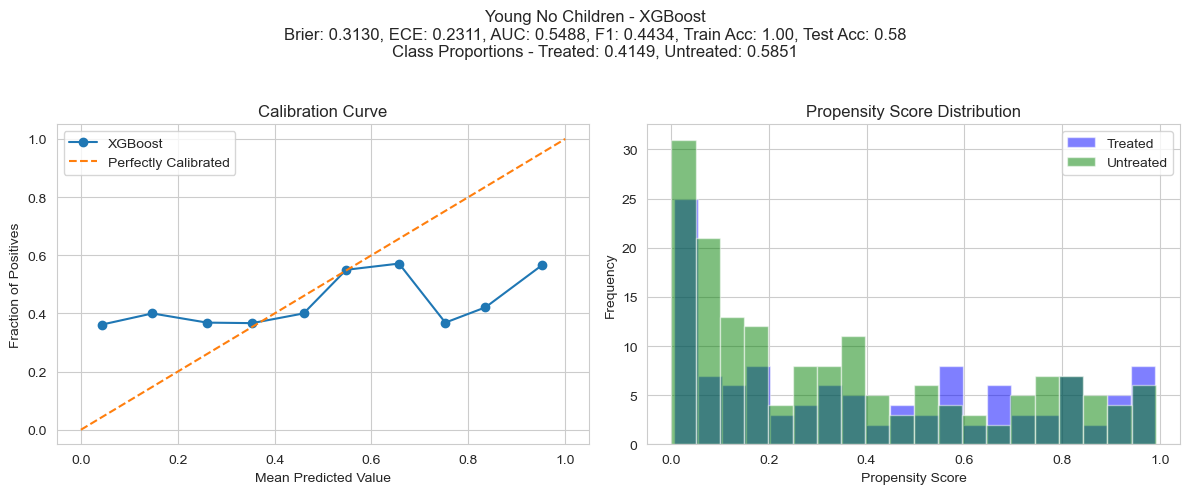

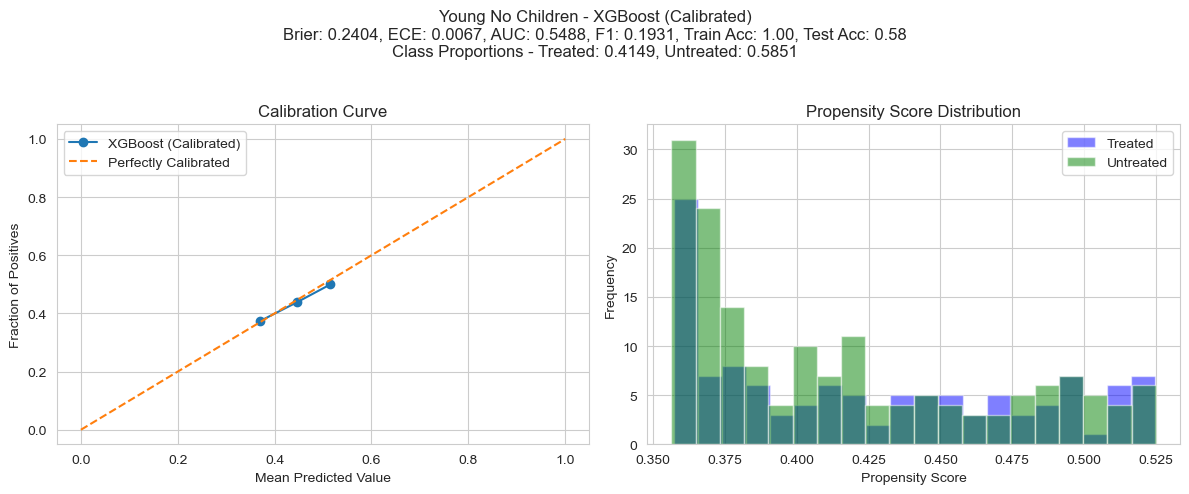

In [17]:
# Plot calibration curves and histograms for all models (both calibrated and uncalibrated)
ync_ps_estimator.plot_calibration()


In [18]:
# Set default to the calibrated version of Logistic Regression (L2)
ync_ps_estimator.set_default('Logistic Regression (L2) (Calibrated)')

# Estimate the ATE using the calibrated model
ate, ci = ync_ps_estimator.estimate_ate(ync_data['X_test'], ync_data['T_test'], ync_data['Y_test'])

print(f"Estimated ATE: {ate:.4f}")
print(f"95% Confidence Interval: ({ci[0]:.4f}, {ci[1]:.4f})")


Estimated ATE: 0.1703
95% Confidence Interval: (-0.5400, 0.8806)


# Old code

In [19]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.calibration import CalibratedClassifierCV, calibration_curve
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import brier_score_loss
# 
# # Assuming your data is already split: X_train, X_test, T_train, T_test
# 
# # Define hyperparameter grids for each model, including L1 and ElasticNet regularization for logistic regression
# param_grid = {
#     'Logistic (L2)': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']},  # L2 (default)
#     'Logistic (L1)': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'], 'solver': ['liblinear']},  # L1 (Lasso)
#     'Logistic (ElasticNet)': {'C': [0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.1, 0.5, 0.9], 'solver': ['saga']},  # ElasticNet
#     'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},
#     'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.3]},
#     'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
#     'KNN': {'n_neighbors': [3, 5, 7]},
#     'XGBoost': {'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [50, 100, 200]}
# }
# 
# # Define all models (with different penalties for logistic regression)
# raw_models = {
#     'Logistic (L2)': LogisticRegression(max_iter=1000),
#     'Logistic (L1)': LogisticRegression(max_iter=1000),
#     'Logistic (ElasticNet)': LogisticRegression(max_iter=1000),
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'SVM': SVC(probability=True, random_state=42),
#     'KNN': KNeighborsClassifier(),
#     'Naive Bayes': GaussianNB(),
#     'XGBoost': XGBClassifier(eval_metric='logloss', verbosity=1)
# }
# 
# # Fit all models using cross-validation (GridSearchCV)
# fitted_models = {}
# 
# for model_name, model in raw_models.items():
#     if model_name in param_grid:  # Only perform GridSearchCV on models with hyperparameters to tune
#         print(f'Fitting {model_name} with GridSearchCV...')
#         grid_cv = GridSearchCV(model, param_grid[model_name], cv=5, verbose=1)
#         grid_cv.fit(X_train, T_train)
#         fitted_models[model_name] = grid_cv.best_estimator_
#         print(f"Best hyperparameters for {model_name}: {grid_cv.best_params_}")
#     else:
#         print(f'Fitting {model_name}...')
#         model.fit(X_train, T_train)
#         fitted_models[model_name] = model
# 
# # Calibration methods (Platt scaling and Isotonic regression)
# calibration_methods = ['sigmoid', 'isotonic']
# 
# # Add calibrated versions of the fitted models (skip Naive Bayes since it doesn't need calibration)
# calibrated_models = {}
# for method in calibration_methods:
#     for model_name, model in fitted_models.items():
#         if model_name != 'Naive Bayes':  # Skip models that don't need calibration or don't support it
#             calibrated_models[f'{model_name} (Calibrated - {method})'] = CalibratedClassifierCV(model, cv='prefit', method=method)
# 
# # Fit calibrated models
# for model_name, model in calibrated_models.items():
#     print(f'Fitting {model_name}...')
#     model.fit(X_train, T_train)
# 
# # Combine raw and calibrated models for evaluation
# all_models = {**fitted_models, **calibrated_models}
# 
# # Function to calculate and print Brier score
# def evaluate_model(model, model_name, X_test, T_test):
#     pred_proba = model.predict_proba(X_test)[:, 1]
#     
#     # Calculate Brier score
#     brier_score = brier_score_loss(T_test, pred_proba)
#     print(f'{model_name} - Brier Score: {brier_score:.4f}')
#     
#     return brier_score
# 
# # Evaluate each model and store results
# model_scores = {}
# 
# for model_name, model in all_models.items():
#     print(f'Evaluating {model_name}...')
#     brier_score = evaluate_model(model, model_name, X_test, T_test)
#     model_scores[model_name] = {'Brier Score': brier_score}
# 
# # Sort models by Brier score and select the top 3
# sorted_models_by_brier = sorted(model_scores.items(), key=lambda x: x[1]['Brier Score'])
# top_3_models = sorted_models_by_brier[:3]
# 
# print(f'Top 3 models based on Brier score: {[m[0] for m in top_3_models]}')
# 
# # Plot calibration curves for the top 3 models
# plt.figure(figsize=(10, 6))
# 
# for model_name, _ in top_3_models:
#     model = all_models[model_name]
#     pred_proba = model.predict_proba(X_test)[:, 1]
#     fraction_of_positives, mean_predicted_value = calibration_curve(T_test, pred_proba, n_bins=10)
#     
#     plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=f'{model_name}')
# 
# plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
# plt.title('Calibration Curves for Top 3 Models')
# plt.xlabel('Mean Predicted Value')
# plt.ylabel('Fraction of Positives')
# plt.legend()
# plt.show()
# 
# # Plot histograms for the top 3 models' propensity scores
# for model_name, _ in top_3_models:
#     model = all_models[model_name]
#     best_model_pred = model.predict_proba(X_test)[:, 1]
# 
#     # Get propensity scores for treated and untreated groups
#     treated_scores = best_model_pred[T_test == 1]
#     untreated_scores = best_model_pred[T_test == 0]
# 
#     plt.figure(figsize=(10, 6))
#     plt.hist(treated_scores, bins=20, alpha=0.5, label='Treated', color='blue')
#     plt.hist(untreated_scores, bins=20, alpha=0.5, label='Untreated', color='green')
#     plt.title(f'Propensity Score Distribution for {model_name}')
#     plt.xlabel('Propensity Score')
#     plt.ylabel('Frequency')
#     plt.legend()
#     plt.show()


Fitting Logistic (L2) with GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters for Logistic (L2): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting Logistic (L1) with GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters for Logistic (L1): {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting Logistic (ElasticNet) with GridSearchCV...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

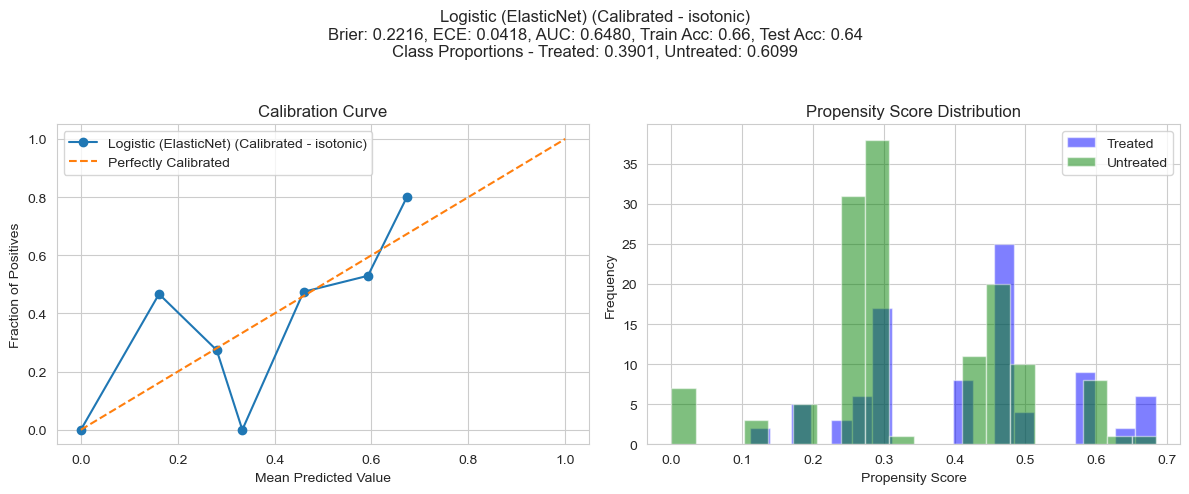

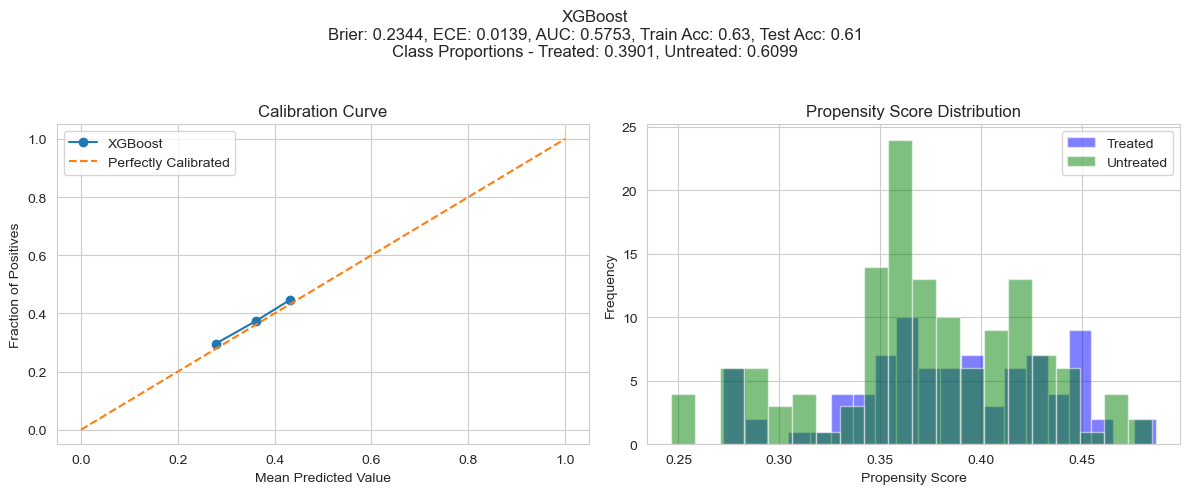

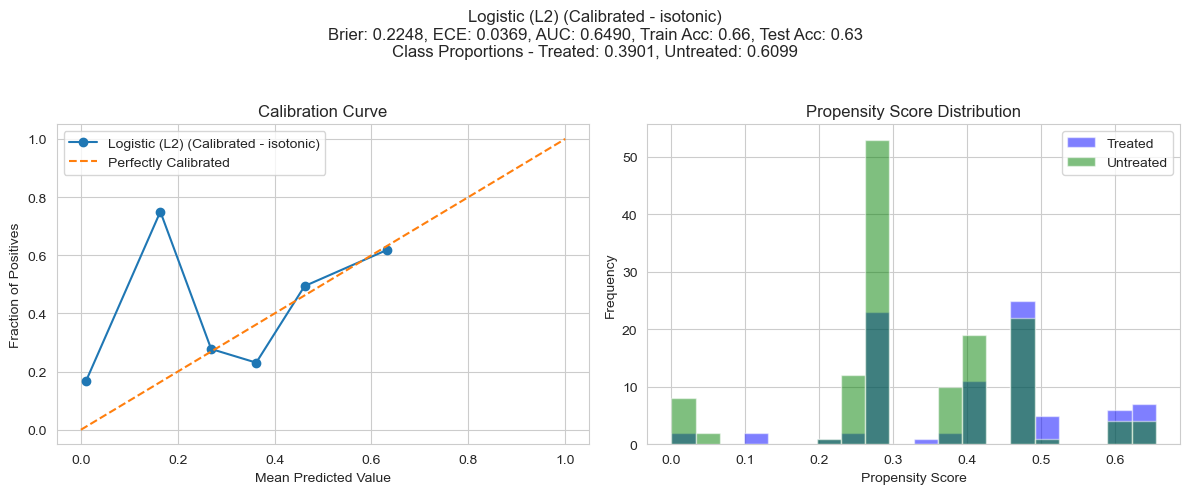

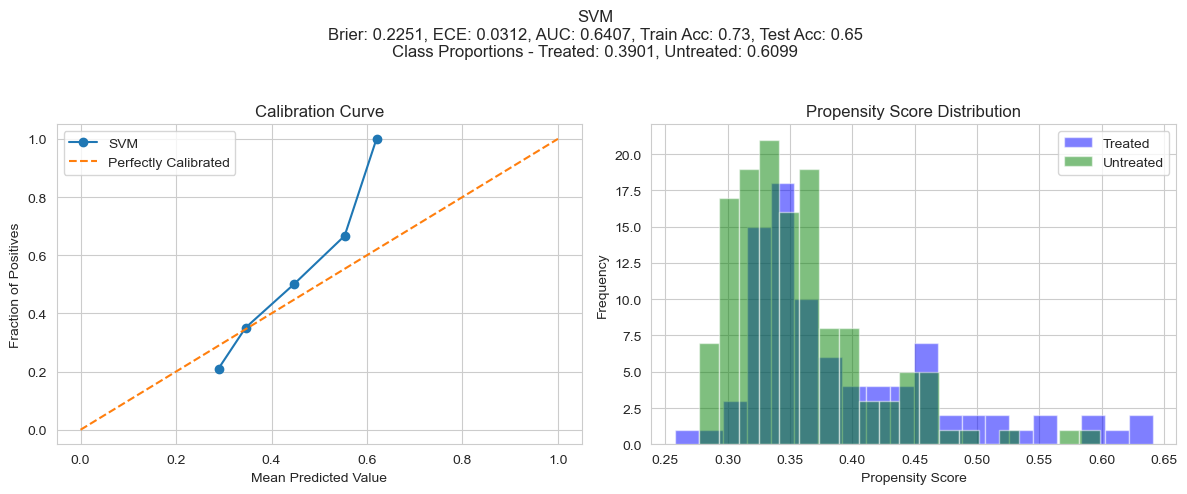

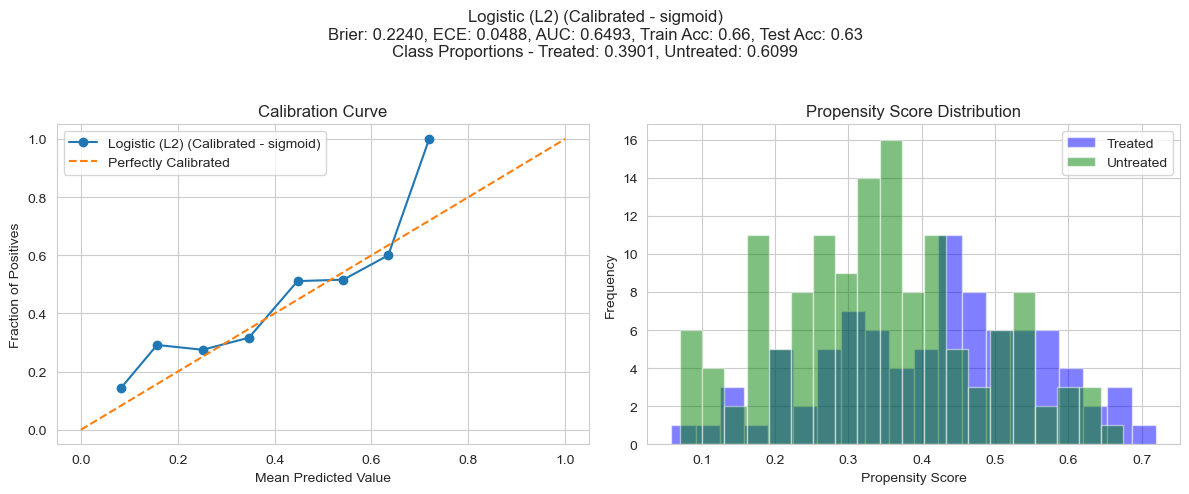

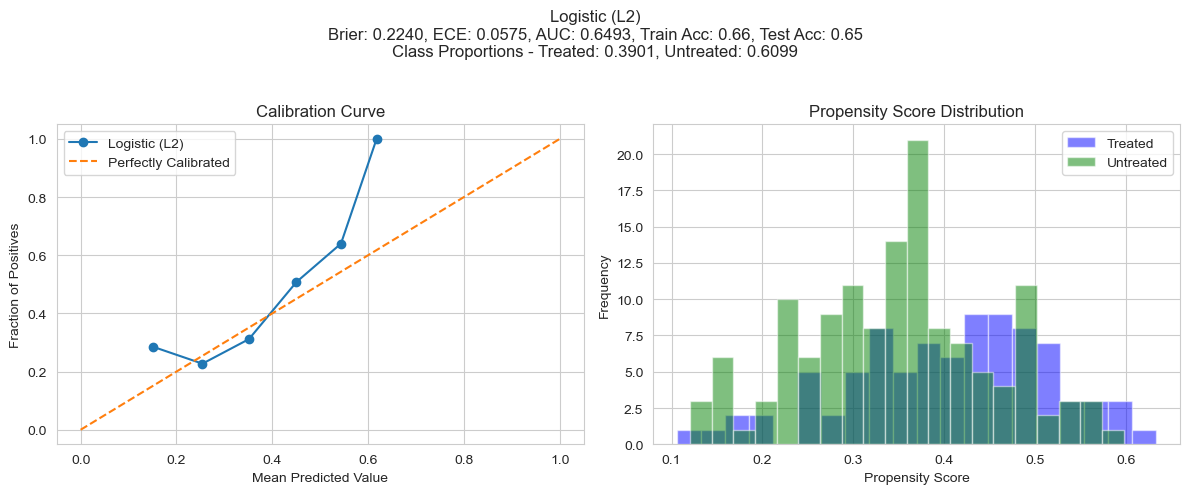

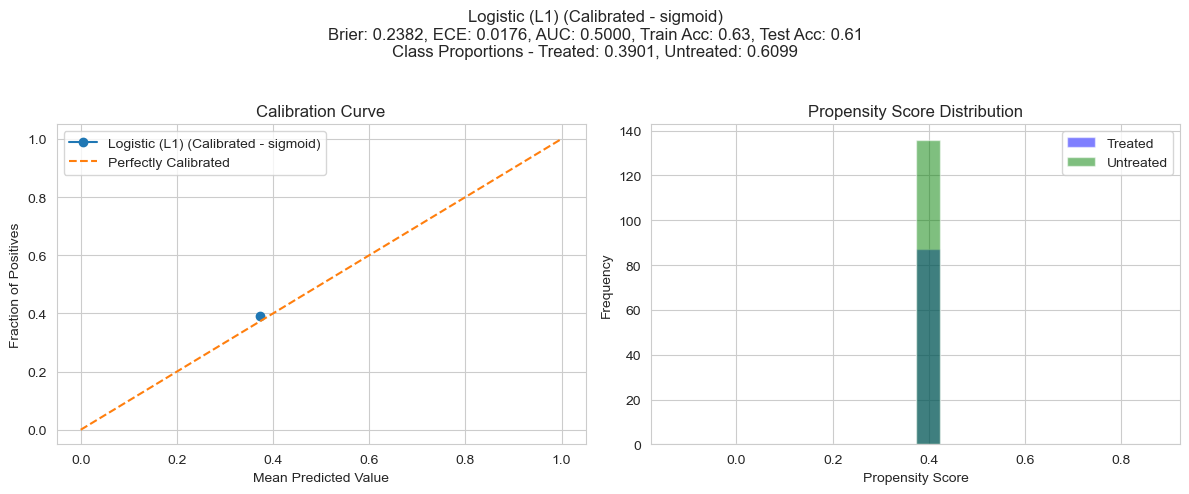

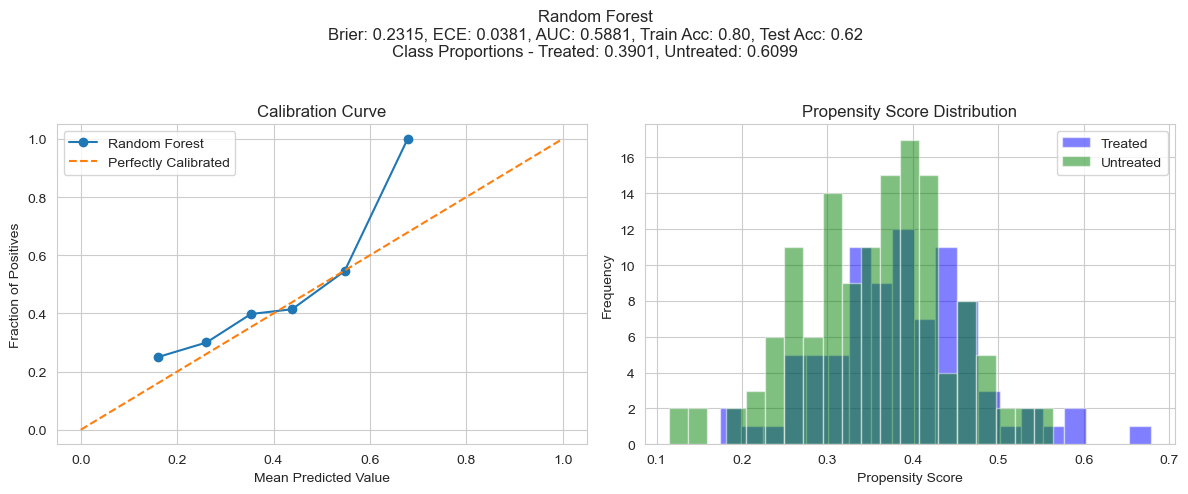

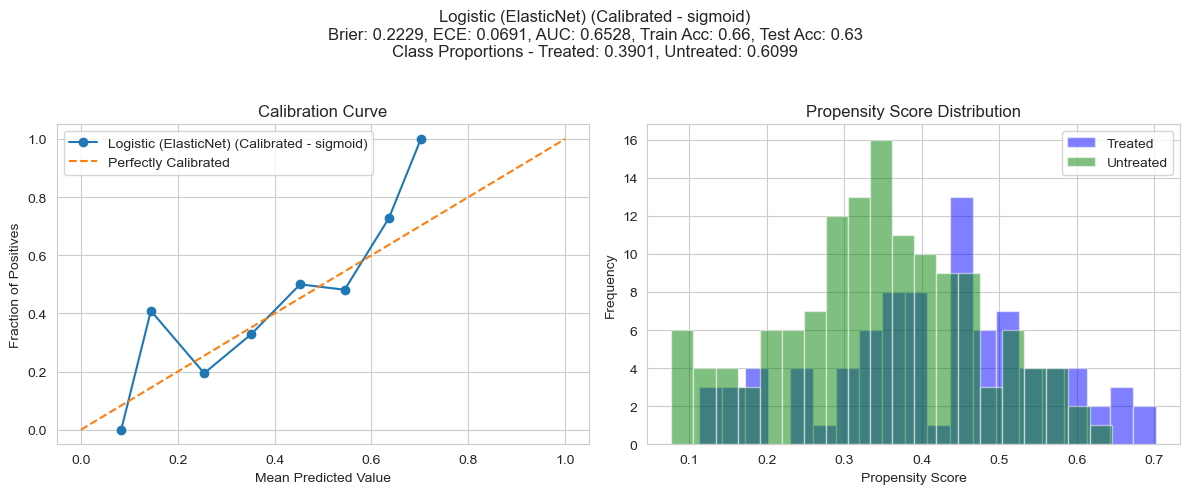

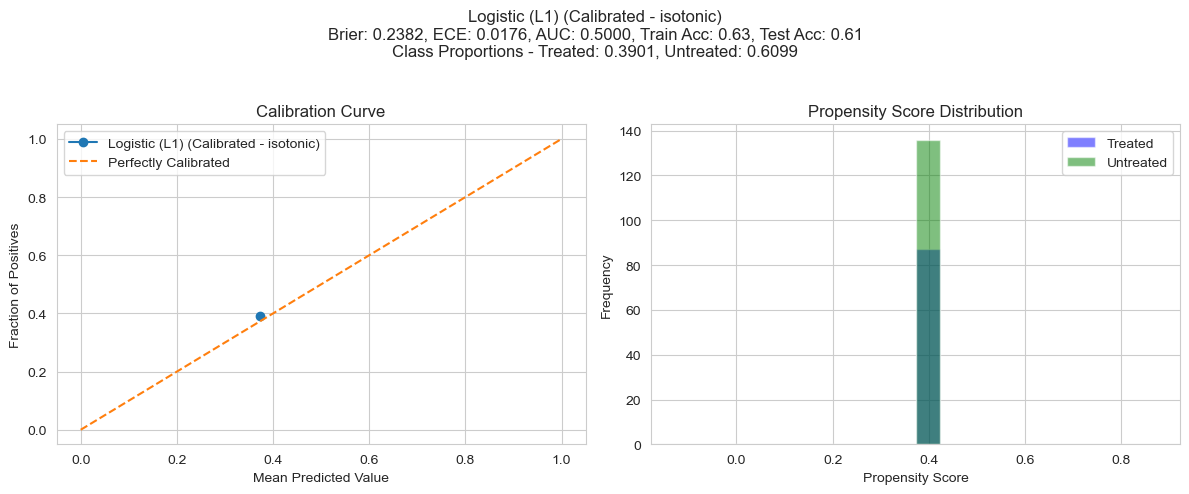

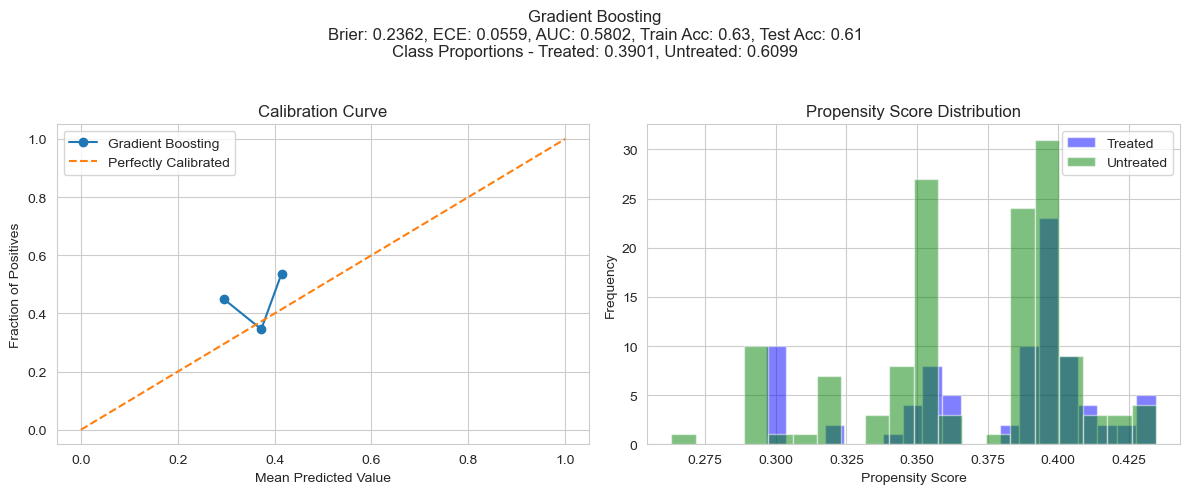

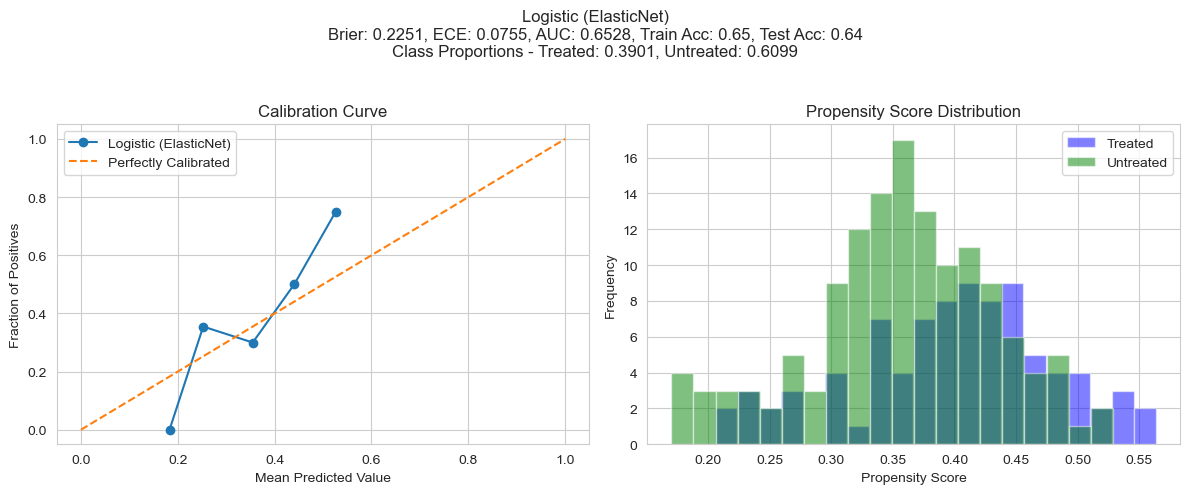

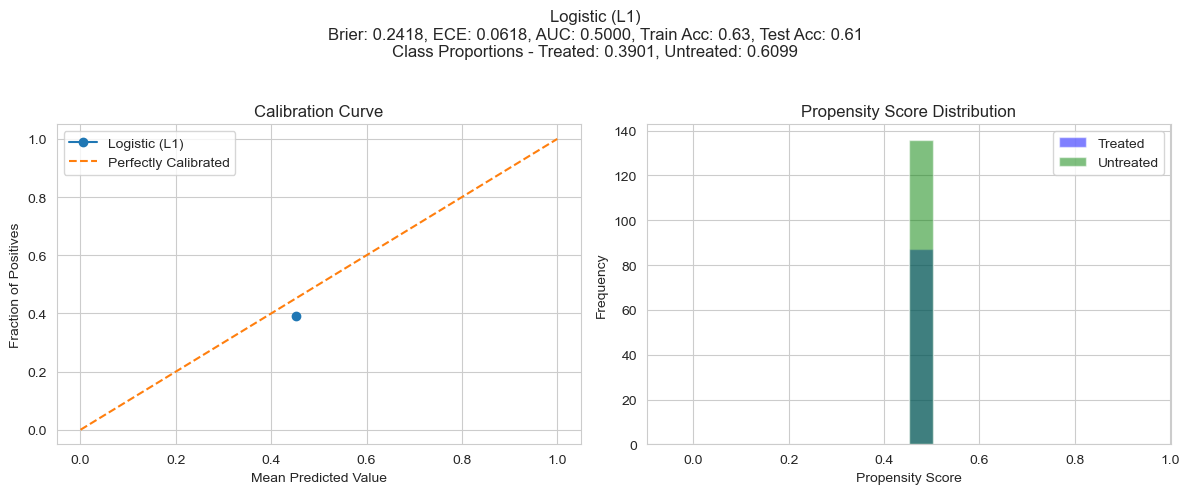

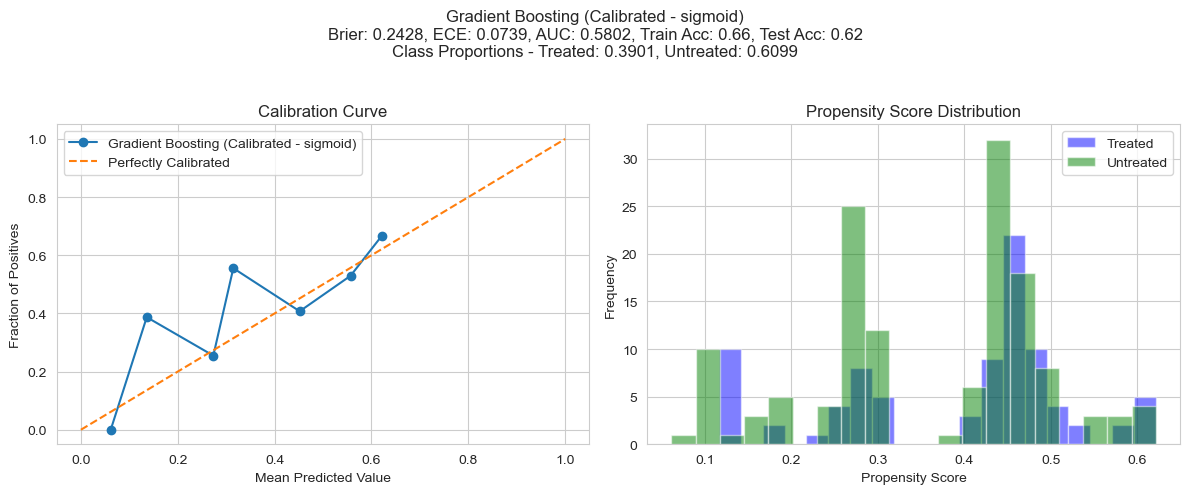

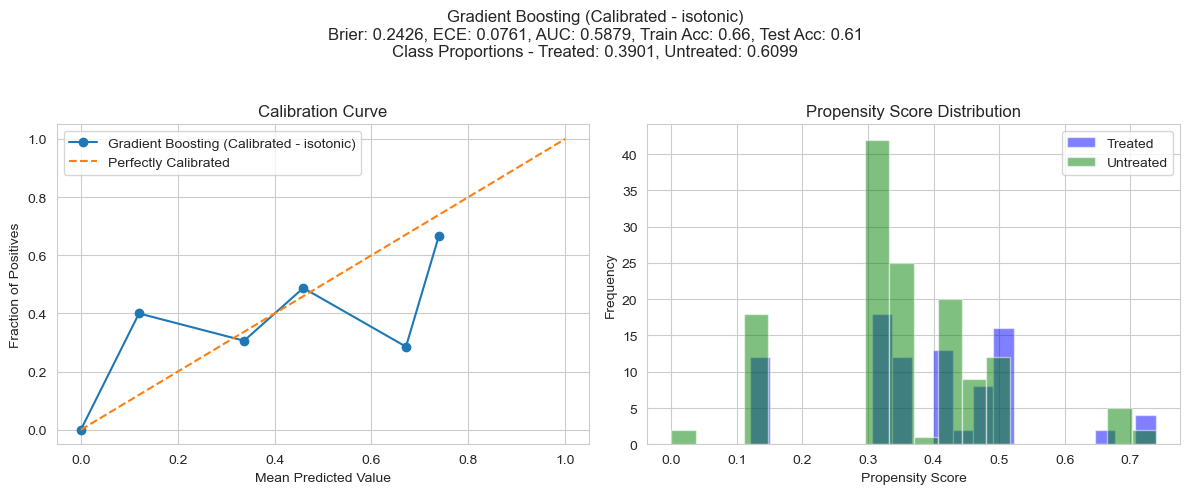

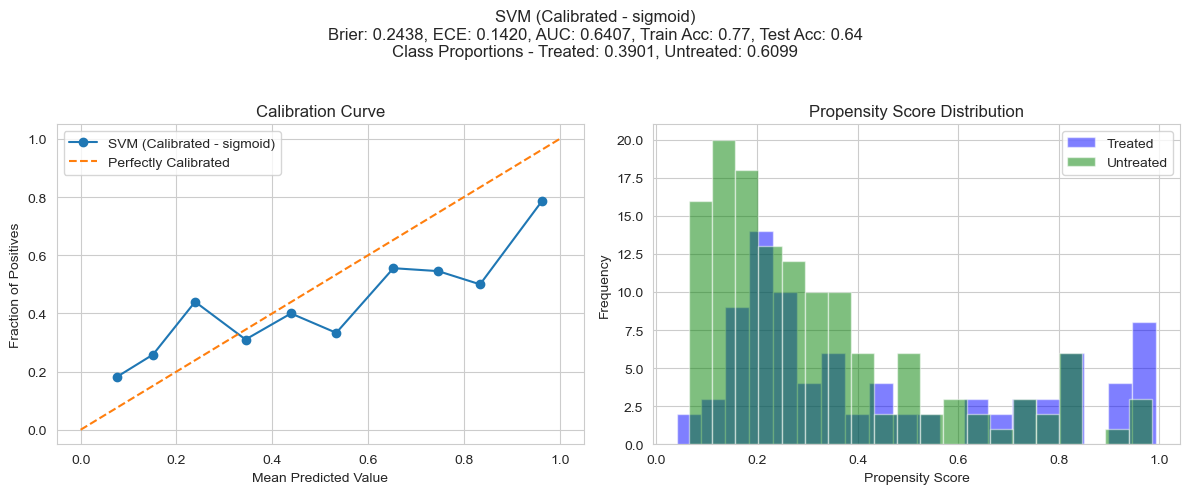

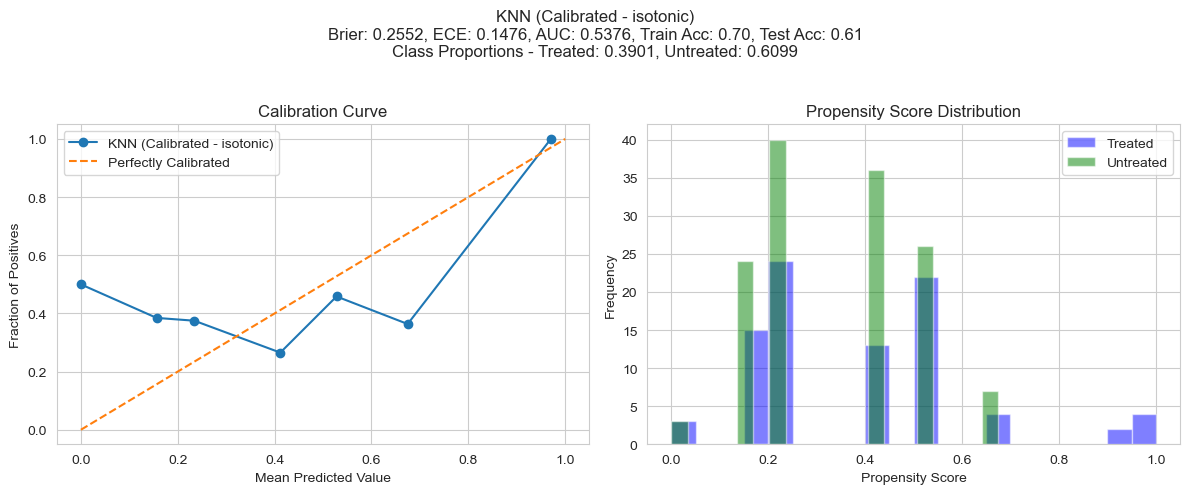

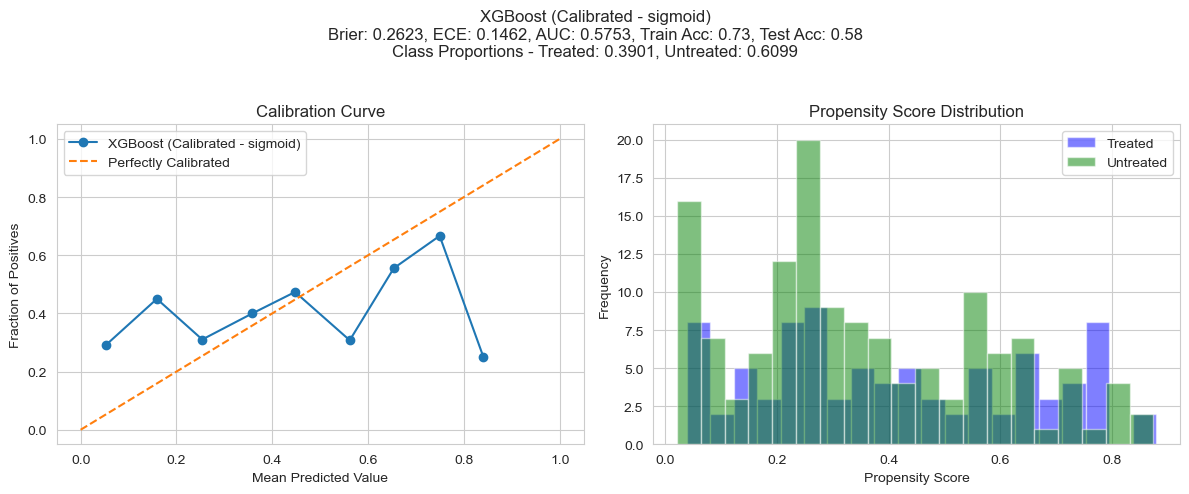

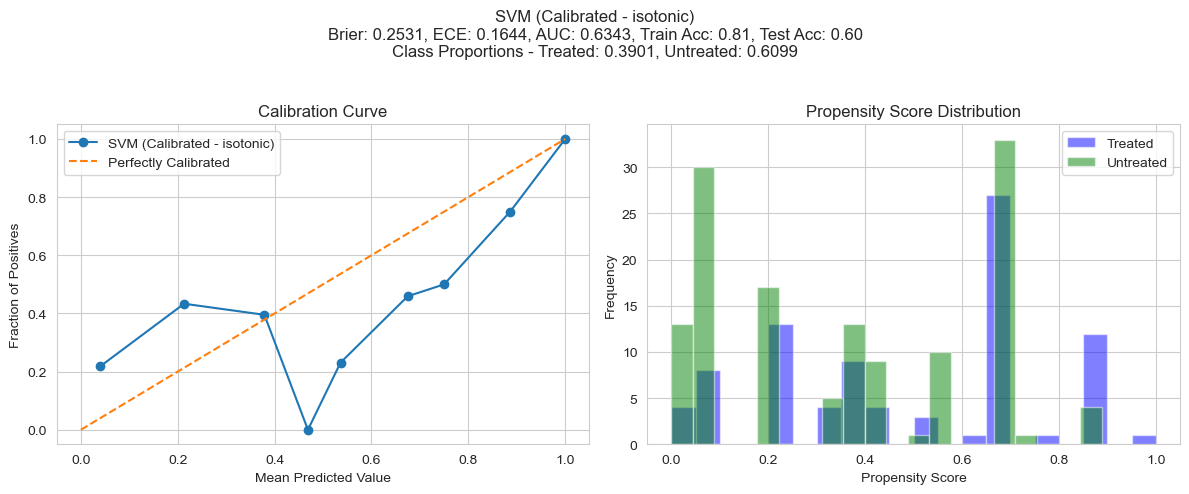

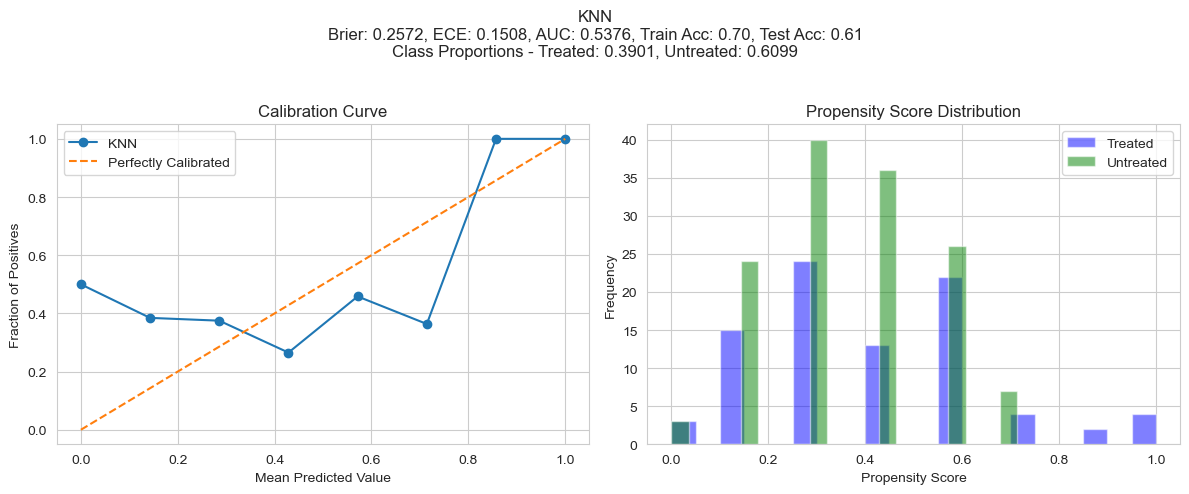

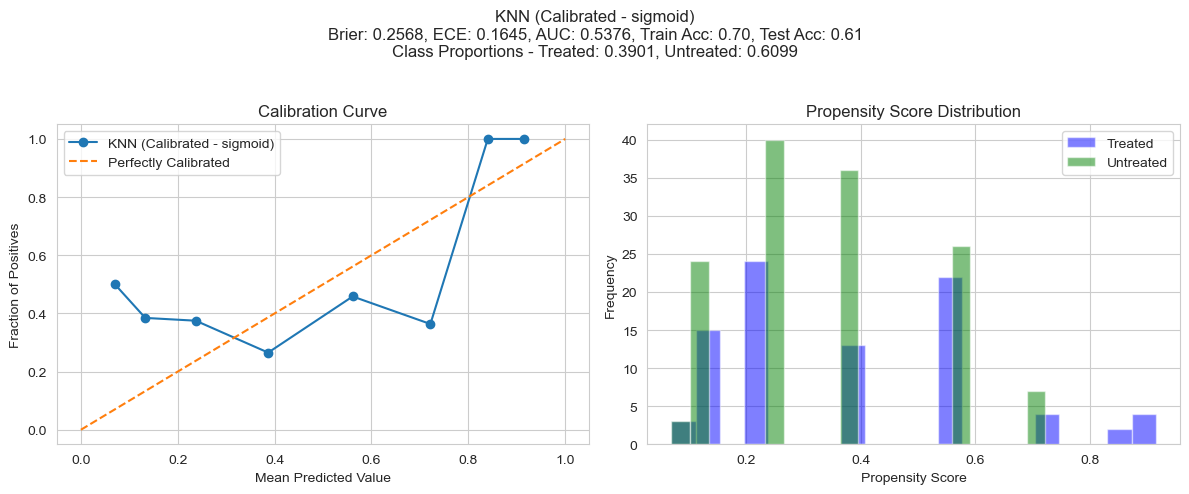

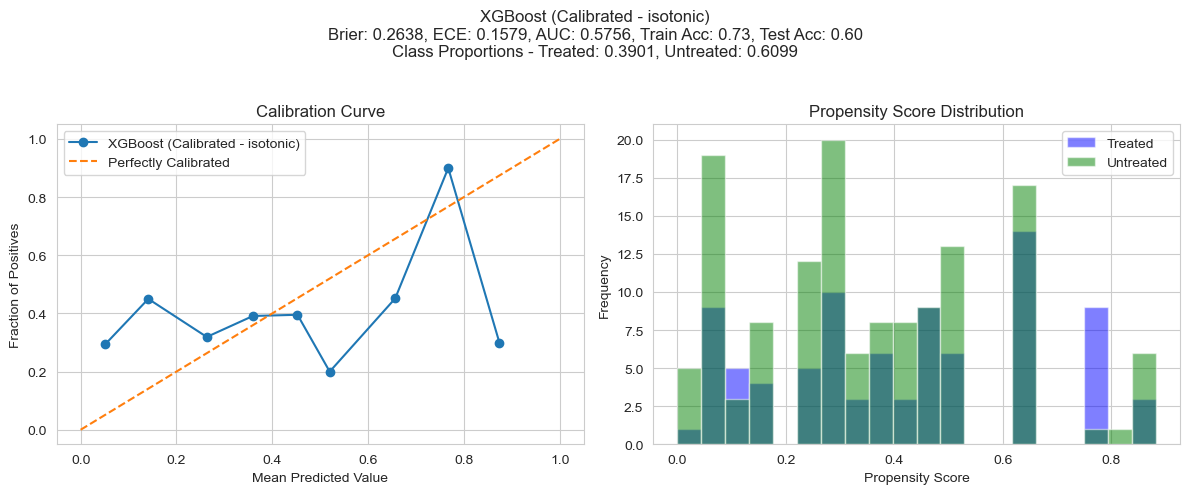

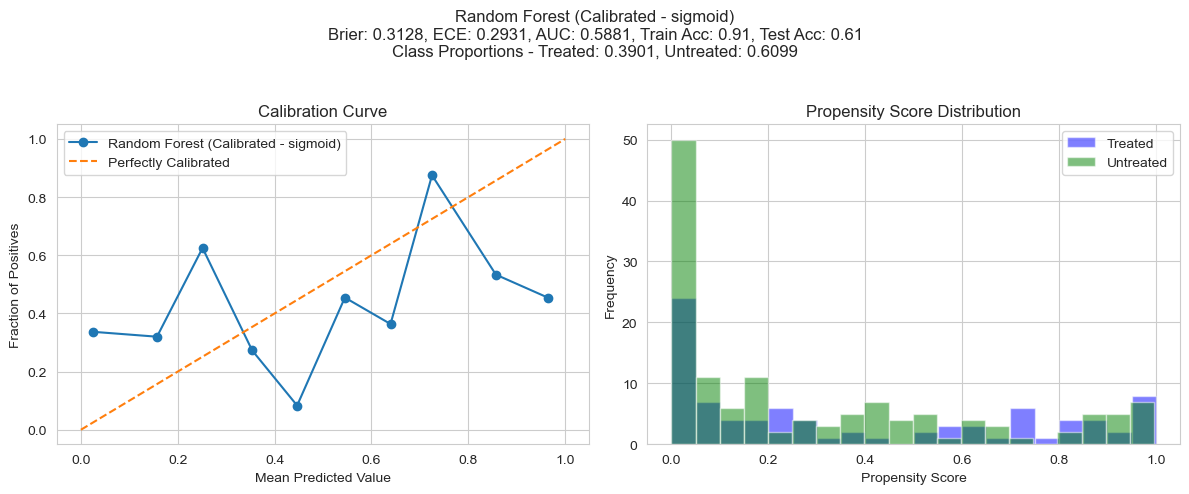

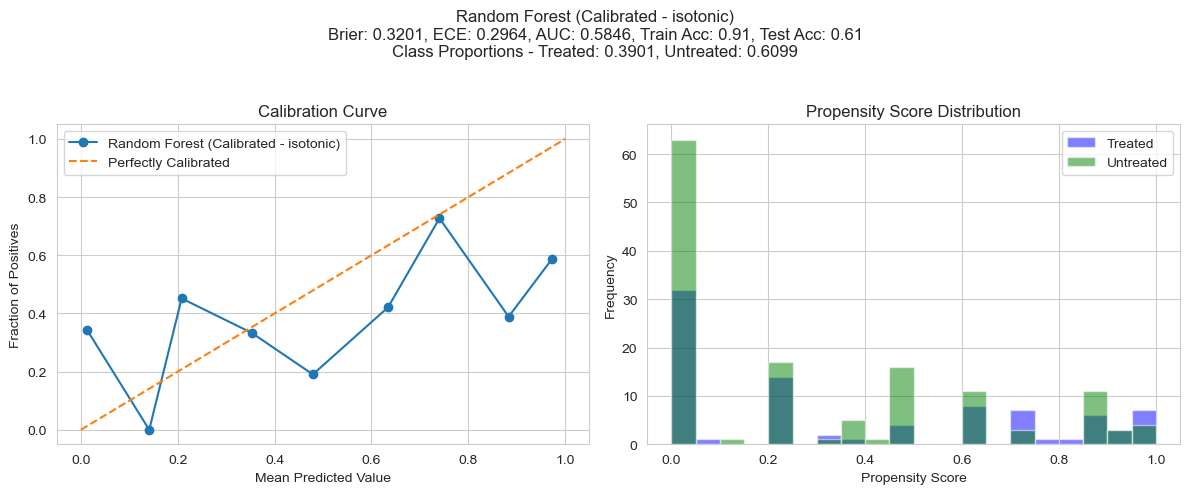

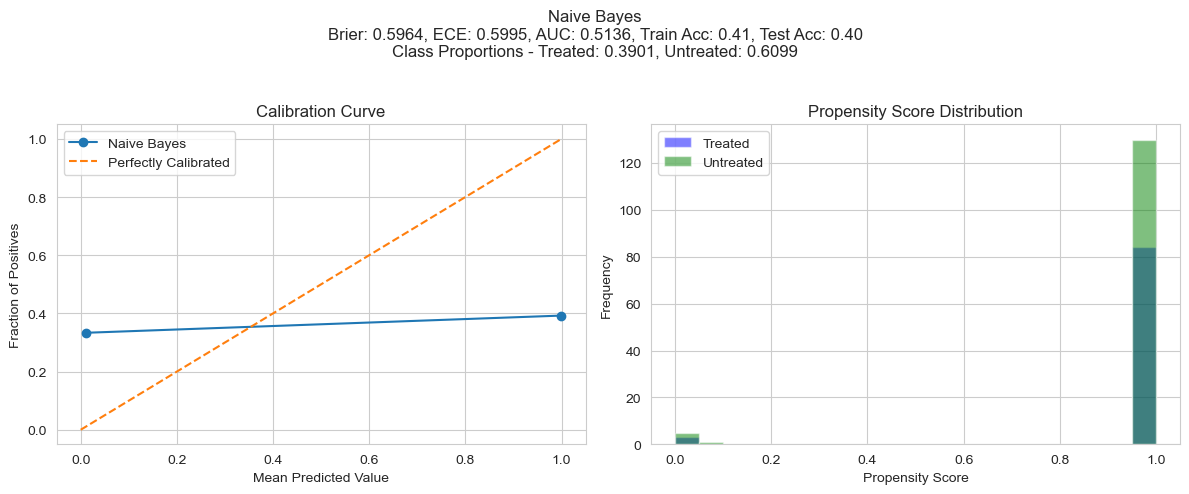

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.calibration import calibration_curve
# from sklearn.metrics import accuracy_score, roc_auc_score
# 
# # Function to compute Expected Calibration Error (ECE)
# def expected_calibration_error(y_true, y_prob, n_bins=10):
#     bin_edges = np.linspace(0, 1, n_bins + 1)
#     bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
#     bin_assignments = np.digitize(y_prob, bin_edges, right=True) - 1
# 
#     bin_sums = np.zeros(n_bins)
#     bin_total = np.zeros(n_bins)
#     bin_positives = np.zeros(n_bins)
# 
#     for b in range(n_bins):
#         bin_mask = bin_assignments == b
#         bin_total[b] = np.sum(bin_mask)
#         bin_sums[b] = np.sum(y_prob[bin_mask])
#         bin_positives[b] = np.sum(y_true[bin_mask])
# 
#     nonempty_bins = bin_total > 0
#     bin_probs = bin_sums[nonempty_bins] / bin_total[nonempty_bins]
#     bin_acc = bin_positives[nonempty_bins] / bin_total[nonempty_bins]
# 
#     ece = np.sum(bin_total[nonempty_bins] * np.abs(bin_acc - bin_probs)) / np.sum(bin_total[nonempty_bins])
#     
#     return ece
# 
# # Function to plot calibration curves and histograms side by side for each model
# def plot_model_results(model_name, model, X_train, T_train, X_test, T_test, brier_score, ece, train_acc, test_acc, auc, class_proportions):
#     # Get predicted probabilities
#     pred_proba = model.predict_proba(X_test)[:, 1]
# 
#     # Create figure with 2 subplots: one for calibration curve, one for histogram
#     fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 
#     # Plot calibration curve
#     fraction_of_positives, mean_predicted_value = calibration_curve(T_test, pred_proba, n_bins=10)
#     axes[0].plot(mean_predicted_value, fraction_of_positives, marker='o', label=f'{model_name}')
#     axes[0].plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
#     axes[0].set_xlabel('Mean Predicted Value')
#     axes[0].set_ylabel('Fraction of Positives')
#     axes[0].legend()
#     axes[0].set_title('Calibration Curve')  # Add subtitle for the calibration curve
# 
#     # Plot histogram of predicted probabilities for treated and untreated groups
#     treated_scores = pred_proba[T_test == 1]
#     untreated_scores = pred_proba[T_test == 0]
#     axes[1].hist(treated_scores, bins=20, alpha=0.5, label='Treated', color='blue')
#     axes[1].hist(untreated_scores, bins=20, alpha=0.5, label='Untreated', color='green')
#     axes[1].set_xlabel('Propensity Score')
#     axes[1].set_ylabel('Frequency')
#     axes[1].legend()
#     axes[1].set_title('Propensity Score Distribution')  # Add subtitle for the histogram
# 
#     # Joint title for both plots
#     fig.suptitle(f'{model_name}\nBrier: {brier_score:.4f}, ECE: {ece:.4f}, AUC: {auc:.4f}, Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}\n'
#                  f'Class Proportions - Treated: {class_proportions[1]:.4f}, Untreated: {class_proportions[0]:.4f}', fontsize=12)
# 
#     # Show the plots
#     plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
#     plt.show()
# 
# # Step 1: Calculate class proportions for T_test
# class_counts = np.bincount(T_test)
# class_proportions = class_counts / len(T_test)
# 
# # Step 2: Calculate Brier score, ECE, AUC, train accuracy, and test accuracy for each model
# for model_name, model_info in model_scores.items():
#     model = all_models[model_name]
# 
#     # Calculate predicted probabilities and accuracy for the test set
#     pred_proba = model.predict_proba(X_test)[:, 1]
#     test_preds = model.predict(X_test)
#     test_acc = accuracy_score(T_test, test_preds)
# 
#     # Calculate predicted probabilities and accuracy for the train set
#     train_preds = model.predict(X_train)
#     train_acc = accuracy_score(T_train, train_preds)
# 
#     # Calculate AUC for the test set
#     auc = roc_auc_score(T_test, pred_proba)
# 
#     # Calculate ECE for the model
#     ece = expected_calibration_error(T_test, pred_proba)
# 
#     # Store the ECE, AUC, train accuracy, and test accuracy in the model info
#     model_info['ECE'] = ece
#     model_info['AUC'] = auc
#     model_info['Train Accuracy'] = train_acc
#     model_info['Test Accuracy'] = test_acc
# 
# # Step 3: Rank models based on Brier score and ECE
# brier_ranks = {model_name: rank for rank, (model_name, _) in enumerate(sorted(model_scores.items(), key=lambda x: x[1]['Brier Score']), 1)}
# ece_ranks = {model_name: rank for rank, (model_name, _) in enumerate(sorted(model_scores.items(), key=lambda x: x[1]['ECE']), 1)}
# 
# # Step 4: Calculate the sum of ranks for Brier score and ECE
# for model_name in model_scores:
#     model_scores[model_name]['Rank Sum'] = brier_ranks[model_name] + ece_ranks[model_name]
# 
# # Step 5: Sort models by the sum of ranks (lower is better)
# sorted_models_by_rank_sum = sorted(model_scores.items(), key=lambda x: x[1]['Rank Sum'])
# 
# # Step 6: Loop over the sorted models to plot the results (best rank sum first)
# for model_name, model_info in sorted_models_by_rank_sum:
#     brier_score = model_info['Brier Score']
#     ece = model_info['ECE']
#     auc = model_info['AUC']
#     train_acc = model_info['Train Accuracy']
#     test_acc = model_info['Test Accuracy']
#     model = all_models[model_name]
# 
#     # Plot results with Brier score, ECE, AUC, train accuracy, test accuracy, and class imbalance in the joint title
#     plot_model_results(model_name, model, X_train, T_train, X_test, T_test, brier_score, ece, train_acc, test_acc, auc, class_proportions)


In [13]:
# # Calculate class imbalance in T_test
# class_counts = np.bincount(T_test)
# class_proportions = class_counts / len(T_test)
# 
# # Print the class proportions
# print(f"Class proportions in T_test:")
# print(f"Treated (T=1): {class_proportions[1]:.4f}")
# print(f"Untreated (T=0): {class_proportions[0]:.4f}")


Class proportions in T_test:
Treated (T=1): 0.3901
Untreated (T=0): 0.6099


In [2]:
# def load_df_dict(path, threshold=None):
#     """
#     Loads dict of X_train, X_test, T_train, T_test, Y_train, Y_test dataframes.
#     If threshold is not None, binarize the treatment variable with the threshold.
#     :param path: path to .pkl
#     :param threshold: threshold to binarize the treatment variable
#     :return: data dict
#     """
#     data = pd.read_pickle(path)
#     
#     data['X_train'] = data.pop('X_train_normalized')
#     data['X_test'] = data.pop('X_test_normalized')
#     
#     if threshold:
#         data['T_train'] = data['T_train'].apply(lambda x: 0 if x <= threshold else 1)
#         data['T_test'] = data['T_test'].apply(lambda x: 0 if x <= threshold else 1)
#     
#     return data